
## GPTs (Train on 300 and predict the next 20)

* compare 100 to 200 to 300


In [1]:

##!pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn


In [2]:

import pandas as pd
import numpy as np


In [3]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [4]:

## import xgboost as xgb
## from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb


In [5]:


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
import torch
import pandas as pd
import sklearn
import random



In [6]:

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## coefficient of determination 
from sklearn.metrics import r2_score



## Read the data


In [7]:

for_RNN_data_CIVS = pd.read_csv('input/RNN_time_DELAYS_2000_PerCast_rcalix.csv')


In [8]:

for_RNN_data_CIVS


Unnamed: 0     SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0              1  0.719500                4.242439          2161.425209   
1              2  0.710486                4.174343          2168.238915   
2              3  0.666106                4.126144          2167.779119   
3              4  0.675145                4.120736          2166.974740   
4              5  0.776831                4.120331          2166.384674   
...          ...       ...                     ...                  ...   
1378        1379  0.762500                4.204430          2169.361647   
1379        1380  0.646000                4.208539          2169.079601   
1380        1381  0.654667                4.212648          2168.797556   
1381        1382  0.591667                4.217784          2168.444999   
1382        1383  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  ...  SE_Uptake_f3  NW_Uptake_f3  \
0              0.354        0.16  ...    182.533770    148.126483   
1              0.313        0.83  ...    183.725050    148.161842   
2              0.360        0.10  ...    195.812061    147.562523   
3              0.319        0.34  ...    188.028883    147.807509   
4              0.335        0.28  ...    200.141261    149.014319   
...              ...         ...  ...           ...           ...   
1378           0.343        0.30  ...    185.900341    148.103530   
1379           0.324        0.30  ...    182.408576    148.106012   
1380           0.325        0.16  ...    181.684649    148.108493   
1381           0.335        0.26  ...    195.202191    148.111595   
1382           0.328        1.08  ...    220.149599    148.115317   

      SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       192.512412     37.369999    36.439999         9.86   
1       192.366046     35.540001    35.970001         9.03   
2       198.423474     34.849998    36.590000         9.13   
3       179.116839     34.009998    35.900002         8.82   
4       186.052137     34.380001    35.970001         8.73   
...            ...           ...          ...          ...   
1378    199.914193     35.900002    37.259998        10.04   
1379    193.501805     35.900002    37.259998        10.04   
1380    194.328694     35.580002    36.500000         9.30   
1381    215.606202     35.130001    37.470001        10.01   
1382    250.937261     35.570000    36.970001         9.47   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.397217              36.882963   
2                   98.334297     18.393974              36.568884   
3                   98.334297     18.370316              36.839147   
4                   98.334297     18.395860              36.658018   
...                       ...           ...                    ...   
1378                98.334297     18.209401              36.727897  

In [9]:

cols_list_DF = for_RNN_data_CIVS.columns.values.tolist()
cols_list_DF


['Unnamed: 0',
 'SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']

In [10]:

l_new = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']


In [11]:

for_RNN_data_CIVS = for_RNN_data_CIVS[l_new]


In [12]:

for_RNN_data_CIVS 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  ...  SE_Uptake_f3  \
0              0.354        0.16            21.080431  ...    182.533770   
1              0.313        0.83            20.996415  ...    183.725050   
2              0.360        0.10            20.749627  ...    195.812061   
3              0.319        0.34            20.609259  ...    188.028883   
4              0.335        0.28            20.617383  ...    200.141261   
...              ...         ...                  ...  ...           ...   
1378           0.343        0.30            21.039583  ...    185.900341   
1379           0.324        0.30            21.043999  ...    182.408576   
1380           0.325        0.16            21.048415  ...    181.684649   
1381           0.335        0.26            21.053935  ...    195.202191   
1382           0.328        1.08            21.060559  ...    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.014319    186.052137     34.380001    35.970001         8.73   
...            ...           ...           ...          ...          ...   
1378    148.103530    199.914193     35.900002    37.259998        10.04   
1379    148.106012    193.501805     35.900002    37.259998        10.04   
1380    148.108493    194.328694     35.580002    36.500000         9.30   
1381    148.111595    215.606202     35.130001    37.470001        10.01   
1382    148.115317    250.937261     35.570000    36.970001         9.47   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.397217              36.882963   
2                   98.334297     18.393974              36.568884   
3                   98.334297     18.370316              36.839147   
4                   98.334297     18.395860              36.658018   
...                       ...    


## Plots


In [13]:

plt.rcParams["figure.figsize"] = [15, 5]


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

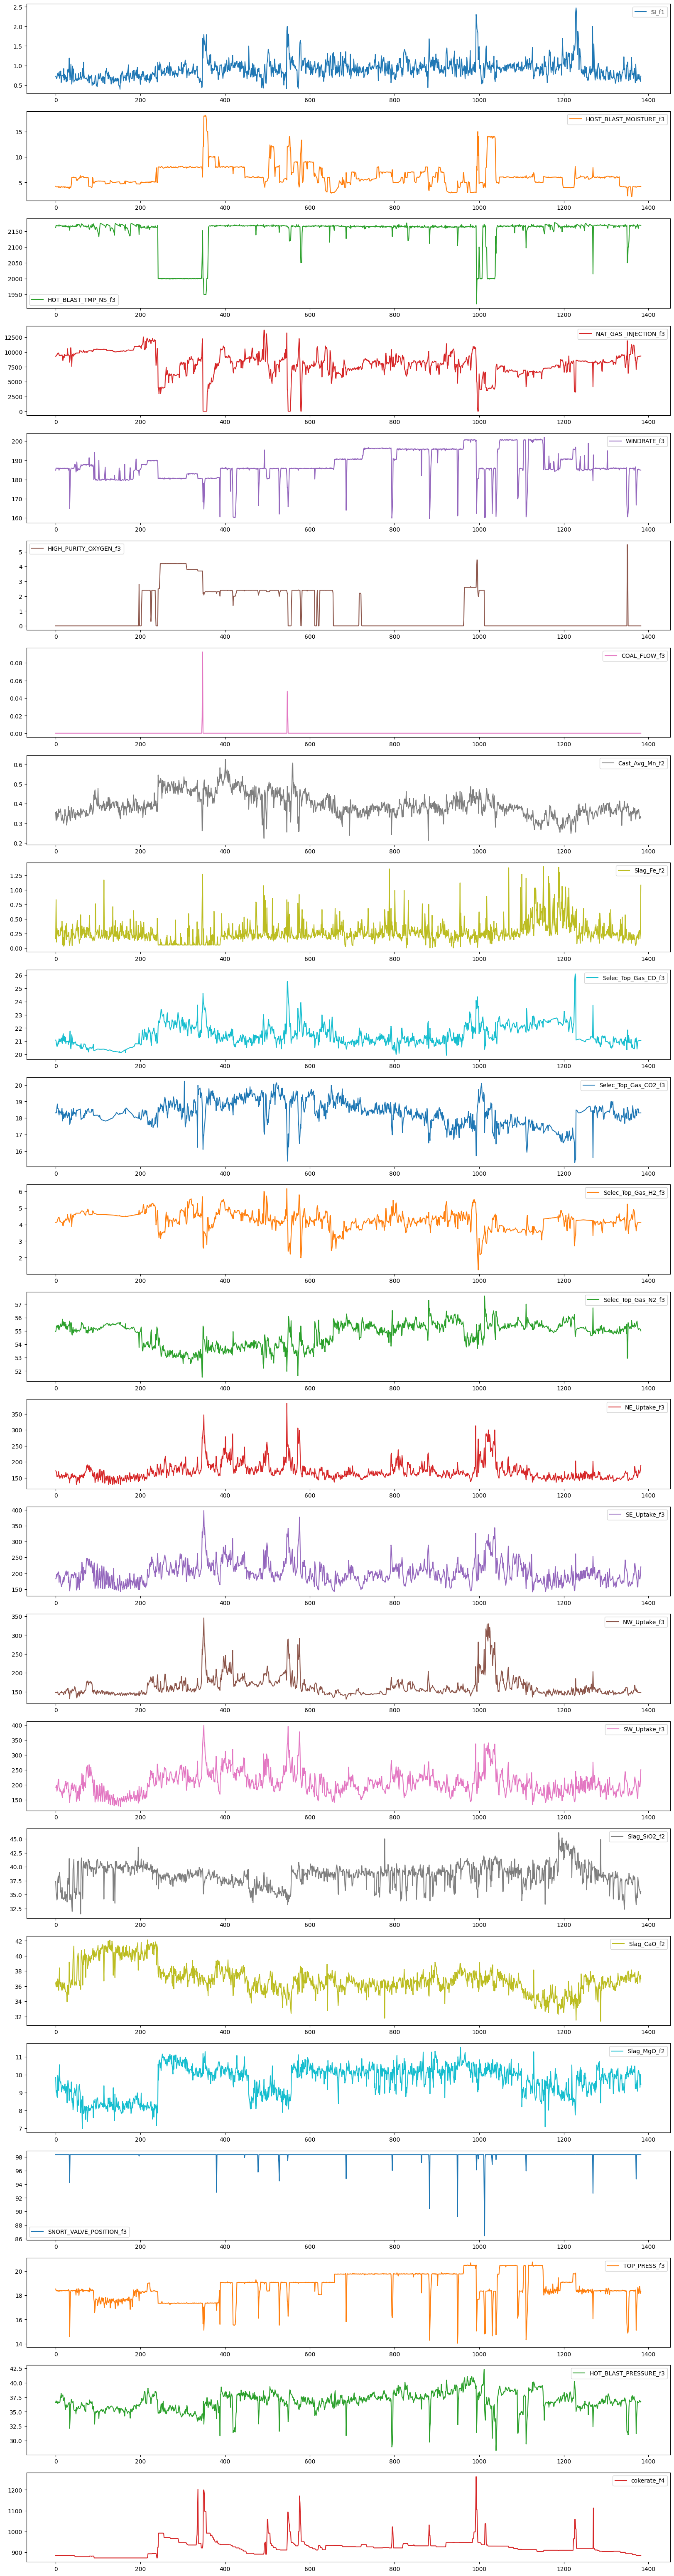

In [14]:

for_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [15]:

print(for_RNN_data_CIVS.shape)


(1383, 24)



## Parameters


In [16]:

pd.options.display.max_columns = None



## Standardize (Scaling)


In [17]:

def standardize_x_scales( data_gpt_pd ):


    data_gpt = torch.tensor(data_gpt_pd.values).float()
        
    epsilon = 0.0001

    print( data_gpt.shape)        
    
    x_means      = data_gpt .mean(0,  keepdim=True)
    x_deviations = data_gpt .std( 0,  keepdim=True) + epsilon

    ## x_train_tr_scaled = (x_train_tr - x_means) / x_deviations
    ## y_test_tr_scaled  = (y_test_tr  - y_means) / y_deviations
    
    return data_gpt, x_means, x_deviations


In [18]:

## x_means      = simple_x_train.mean(0, keepdim=True ) 
## x_deviations = simple_x_train.std( 0, keepdim=True) + epsilon



## Shift and create batches


In [19]:

def get_batch( data_gpt ):
    
    ix = torch.randint(   len(data_gpt) - block_size, (batch_size,)   )

    ## ix = [ int( tensor1.item() ) for tensor1 in ix ]
    ## print(ix.shape)
    ## print(ix)
    ## print(ix[1])
    ## print(  type(ix[1])  )
    ## print( len(data_gpt) - block_size )
    ## print(  block_size )
    ## print(  (batch_size,)  )
    
    x  = torch.stack(    [  data_gpt[   i   : i+block_size    ]   for i in ix ]    ) 
    y  = torch.stack(    [  data_gpt[   i+1 : i+1+block_size  ]   for i in ix ]    )
    
    x, y = x.to(device), y.to(device)

    return x, y


In [20]:

'''

train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )

train_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs

bt_train_x, bt_train_y = get_batch( train_CIVS_tr_scaled )

bt_train_x.shape

bt_train_y.shape

x_means

'''


'\n\ntrain_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )\n\ntrain_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs\n\nbt_train_x, bt_train_y = get_batch( train_CIVS_tr_scaled )\n\nbt_train_x.shape\n\nbt_train_y.shape\n\nx_means\n\n'


## Estimate loss - No Training


In [21]:

@torch.no_grad()    ## for efficient processing
def estimate_loss( model, criterion ):
    
    out = {}
    model.eval()   ## set to no training
    
    for split in ['train', 'test']:
        losses = torch.zeros(eval_iters)
        for k in range( eval_iters ):
            X, Y = get_batch( split )
            logits  = model(X, Y)
            B, T, E  = logits.shape
            pred     = logits.view( B*T, E)
            y_train  = Y.view(B*T, E)
            loss =  criterion( pred, y_train )
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()  ## back to training

    return out



## NN Architectures


In [22]:

class Head(nn.Module):

    def __init__(self, head_size):
        super().__init__()
        
        self.key   = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]
        self.query = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]
        self.value = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]

        tril_def = torch.tril( torch.ones(block_size, block_size) )  ## [40, 40]
        
        self.register_buffer(
                  'tril', 
                  tril_def
               )
        
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        
        B, T, E = x.shape   ## [batch_size, 40, 512]
        
        k = self.key(   x )            ## k = (B, T, 64)
        q = self.query( x )            ## q = (B, T, 64)

        E2 = 64     ## I think this is 64 and not 512
        ## (B, T, E) @ (B, E, T)  -> (B, T, T)
        wei = q @ k.transpose(-2, -1) * E2 ** -0.5        
        
        wei = wei.masked_fill(
                      self.tril[:T, :T] == 0, 
                      float('-inf')
        )   
        
        ## (B, T, T)
        wei = F.softmax( wei, dim= -1 )         ## (B, T, T)
        wei = self.dropout(   wei   )
        
        ## perform weighted aggregation of values
        
        v   = self.value(  x  )   ## x = (B, 40, E)
        out = wei @ v             ## (B, T, T) @ (B, T, 64) -> (B, T, 64)
        
        return out
        


In [23]:

class FeedForward(nn.Module):

    def __init__(self, n_embd):         ## 512
        
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),      ## [512, 4*512]
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),      ## [4*512, 512]
            nn.Dropout(dropout),
        )
        
    def forward(self, x):
        return self.net(x)


In [24]:

class MultiHeadAttention(nn.Module):

    def __init__(self, num_heads, head_size):    ## (8, 64)
        super().__init__()
        self.heads = nn.ModuleList(  [ Head(head_size) for _ in range(num_heads) ] )
        self.proj  = nn.Linear(n_embd, n_embd)   ## 512, 512
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        out = torch.cat(   [ h(x) for h in self.heads ], dim = -1   )
        out = self.proj(  out   )
        out = self.dropout(   out   )
        return out


In [25]:

class Block(nn.Module):
    
    def __init__(self, n_embd, n_head):     ## (512, 8)
        super().__init__()
        head_size = n_embd // n_head        ## 64
        self.sa   = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward( n_embd)    ## 512
        self.ln1  = nn.LayerNorm(n_embd)
        self.ln2  = nn.LayerNorm(n_embd)
        
    def forward(self, x):
        x = x + self.sa(     self.ln1(x)      )
        x = x + self.ffwd(   self.ln2(x)      )
        return x


In [26]:

class Time_Series_GPT(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size):
        
        super().__init__()
        
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        
        ## self.token_embedding_table = nn.Embedding(vocab_size, n_embd)   ## [65, 512]
        self.pos_emb_table         = nn.Embedding(block_size, n_embd)     ## [block, 512]
        
        self.blocks = nn.Sequential(
                *[   Block(n_embd, n_head=n_head) for _ in range(n_layer)    ]
        )
        
        self.ln_f        = nn.LayerNorm(  n_embd    )        
        self.lm_ffw_head = nn.Linear(n_embd, 24)  ## [512, 65] # FFW Layer

        self.map_24_512 = nn.Linear(24, 512)  ## [24, 512] # rc remove
        

    def forward(self,  idx, targets):

        ## print( idx.shape      )
        ## print( targets.shape  )

        B = idx.shape[0]       ## 8
        T = idx.shape[1]       ## 20
        
        ## B, T = idx.shape     ## (Batch, 40)
        ## ids and targets are both (B, T) tensors of integers
        ## tok_emb = self.token_embedding_table(idx)  

        idx = self.map_24_512( idx )

        tok_emb = idx       ## (8, 20, 24)
        pos_emb = self.pos_emb_table( torch.arange(T, device=device) )  

        ## print("blue")
        ## print(tok_emb.shape)
        ## print(pos_emb.shape)
        
        x = tok_emb + pos_emb    ## [B, T, E] or [64, 40, 512], now [8, 20, 24]

        ## self.map_24_512 = nn.Linear(24, 512)  ## [24, 512] # rc remove
        
        x = self.blocks(  x  )   ## (B, T, E)   
        x = self.ln_f(    x  )   ## (B, T, E)   ## norm
        logits = self.lm_ffw_head(x)         ## [B, 40, 65] 
        
        return logits
        
        
    def generate(self, idx, max_new_tokens):    ## idx is (B, T)
        for _ in range(max_new_tokens):
            ## crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:, :]
            print(idx_cond.shape)
            logits = self(idx_cond, 0 )    ## ## get preds
            logits = logits[:, -1, :]    ## focus on last one (B, E)
            logits = logits.unsqueeze(0)
            print(logits.shape)
            ## probs = F.softmax(logits, dim= -1)    ## (B, E) get probs
            ## idx_next = torch.multinomial(probs, num_samples=1)     ## (B, 1) selected
            idx = torch.cat(  (idx, logits), dim=1  )   ## (B, T+1) append sample to running sequence
            print(idx.shape)
        return idx
            


In [31]:

def train_model_GPT( train_CIVS_2 ):
 
    
    model  = Time_Series_GPT(block_size, 24, 24)
    model  = model.to( device )
    
    optimizer       = torch.optim.Adam(     model.parameters(), lr=learning_rate   )
    ## optimizer    = torch.optim.RMSprop(  model.parameters(), lr=learning_rate   )

    criterion       = nn.MSELoss()
    ## criterion       = nn.L1Loss()
    ## criterion_kl    = nn.KLDivLoss(reduction="batchmean")
    
    history = {'loss': [], 'test_loss': []}

    ## train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )
    
    train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS_2 )

    train_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs
        
    model.train()
    
    for batch_i, epoch in enumerate( range(max_iters) ):

        ## xb, yb = get_batch('train')
        xb, yb    = get_batch( train_CIVS_tr_scaled )

        logits   = model( xb, yb )

        B, T, E  = logits.shape
        
        pred           = logits.view( B*T, E)
        y_train        = yb.view(B*T, E)

        ## loss_cost = 0.0
        ## loss =  ( 1.0-loss_cost ) * criterion( pred, y_train ) + ( loss_cost ) * criterion( pred[:, 0], y_train[:, 0]  ) 

        #######################################################
        ## ind1 = random.randrange(0, y_train.shape[0] - 5)
        ## ind2 = ind1 + 5
        ## loss =  criterion( pred[ind1:ind2, :], y_train[ind1:ind2, :] )
        #######################################################

        loss =  criterion( pred, y_train )  ## seems better

        ##  loss = criterion( pred[:, 0], y_train[:, 0]  ) 
        
        optimizer.zero_grad(set_to_none=True)           ## zero out
        loss.backward()
        optimizer.step()

        history['loss'].append(  loss.item()  )

        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item() )

    
    return model, history, x_means, x_standard_devs



## Parameters


In [32]:

torch.manual_seed(256)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

block_size        = 15   ## 20     ## 4          ## 40      ## N tokens in sequence
batch_size        = 16 
max_iters         = 3000   ## 5000
eval_interval     = 500     
learning_rate     = 0.0001
eval_iters        = 300
vocab_size        = 88  ## 65

## every id for a given token is embedded to vector of this size

n_embd            = 512   ## 24        ## 512       ## 24 for time series, silicon is 0           
n_head            = 8         ## 8 attention heads
n_layer           = 6         ## 6 eoncoder layers
dropout           = 0.2



## Utility Functions


In [33]:

def GPT_get_batch_test( test_data ):
    
    ## x_time_series = torch.tensor(test_data.values).float()

    x_time_series = test_data

    print( x_time_series.shape )

    x  = torch.stack(   [   x_time_series[ 0 : -1    ]    ]    ) 
    y  = torch.stack(   [   x_time_series[ 1 :       ]    ]   )
    
    x, y = x.to(device), y.to(device)

    return x, y


In [34]:

def GPT_generate_inference(model, x_test, which_feature, string_feature, train_CIVS_2_a ):

    xb_test, yb_test = GPT_get_batch_test( x_test )
    
    print(xb_test.shape)
    print(yb_test.shape)

    input_test_x = xb_test[ :,  : 5 ]
    print("input to m.generate")
    print(input_test_x.shape)


    pred_20_seq = model.generate( input_test_x, 14 )

    print("shape of model generated output: ")
    print(pred_20_seq.shape)

    
    y_pred_gpt     = pred_20_seq.detach().cpu().numpy() 
    y_real_gpt     =     yb_test.detach().cpu().numpy() 
    
    print(y_pred_gpt.shape)
    print(y_real_gpt.shape)

    
    y_real_gpt = y_real_gpt.squeeze(0)
    y_pred_gpt = y_pred_gpt.squeeze(0)

    print( "unscaling" )

    print(y_pred_gpt.shape)
    print(y_real_gpt.shape)

    l_real = y_real_gpt[ :, 0]
    l_pred = y_pred_gpt[ :, 0]

    si_mean         = x_means[0, 0].numpy()
    si_standard_dev = x_standard_devs[0, 0].numpy()

    print("these: ")
    print( x_means.shape )
    print( l_pred.shape )
    print( si_standard_dev.shape )
    print( si_mean.shape )
    print( si_standard_dev )
    print( si_mean)
    print( l_pred )
    

    ## y_descaled = y_scaled * self.y_deviations + self.y_means
    l_pred        = l_pred   * si_standard_dev   + si_mean
    l_real        = l_real   * si_standard_dev   + si_mean

    print( l_pred )
    
    print("unscale si end")


    eval_criterion = nn.MSELoss()

    mse_eval_bins = eval_criterion(
                          torch.FloatTensor( l_pred ), 
                          torch.FloatTensor( l_real )
    )

    print( l_pred  )
    print( l_real )

    print( l_pred.shape  )
    print( l_real.shape  )

    
    print( string_feature )
    print(f'Test MSE Loss: {mse_eval_bins.item():.4f}')
    print(l_real)
    print(l_pred)
    print( "Testing R**2: ", r2_score(  l_real,  l_pred     )  )


    #######################################

    x = [ i for i in range(len(l_real)) ] 
    print(len(x))

    plt.scatter(x, l_real, label = "real", color='red') 
    plt.plot(   x, l_real, label = "real", color='red') 
 
    ##print( l_pred[1:].shape )
    ##print( l_pred[0].shape )
    ## l_pred  = np.concatenate( ( l_pred[1:, ], l_pred[0] ) )
    
    l_pred = np.roll(l_pred, -1)
    
    plt.scatter(x, l_pred, label = "pred", color='blue') 
    plt.plot(   x, l_pred, label = "pred", color='blue') 
    
    plt.legend() 
    plt.show()

    ##########################################

    train_plot = torch.tensor(train_CIVS_2_a.values).float().numpy()
    print( train_plot.shape )
    train_real_plot = train_plot[:, 0]
    ## l_real  = np.concatenate( ( train_real_plot[1: ], train_real_plot[:1] ) )
    l_real  = np.concatenate( ( train_real_plot, l_real ) )
    l_pred  = np.concatenate( ( train_real_plot, l_pred ) )
    ######################################

    x = [ i for i in range(len(l_real)) ] 
    print(len(x))

 

    fig, ax = plt.subplots(2, 1) 
    ax[0].set_title(f'GPT Generate')
    ##ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
    ##ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
    ax[0].scatter(x, l_real, label = "real", color='red') 
    ax[0].plot(   x, l_real, label = "real", color='red') 
    ax[0].scatter(x, l_pred, label = "pred", color='blue') 
    ax[0].plot(   x, l_pred, label = "pred", color='blue') 
    ax[0].legend()
    
    ax[1].set_title(f"GPT")

    fig.tight_layout()
    ax[1].legend(); plt.show()


In [35]:

def function_train_rc(  train_data  ):
    train_CIVS_2 = train_data
    si_GPT, history_GPT, x_means, x_standard_devs = train_model_GPT( train_CIVS_2 )

    fig, ax = plt.subplots(2, 1) 
    ax[0].set_title(f'GPT  Train  Loss  per epoch')
    ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
    ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
    ax[0].legend()
    ax[1].set_title(f"GPT")

    fig.tight_layout()
    ax[1].legend(); plt.show()

    return si_GPT, history_GPT, x_means, x_standard_devs 

    

In [36]:

def function_test_rc( train_data, test_CIVS, si_GPT, x_means, x_standard_devs):
    train_CIVS_2 = train_data
    
    print(  test_CIVS.shape )
    print( train_data.shape )
    ## print( train_data[ -5: ] )

    frames           = [ train_data[ -5: ], test_CIVS ]
    test_CIVS_concat = pd.concat( frames )
    print( test_CIVS_concat.shape )

    test_CIVS_tr = torch.tensor(test_CIVS_concat.values).float()
    test_CIVS_tr_scaled = ( test_CIVS_tr - x_means ) / x_standard_devs
    print(  test_CIVS_tr_scaled.shape )

    batch_x_test = test_CIVS_tr_scaled
    print( batch_x_test.shape )
    GPT_generate_inference(   si_GPT,  batch_x_test, 0 , "SI", train_CIVS_2 )



## The Data


In [37]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.0


## Pick slice randomly


In [38]:

training_chunk = 200


In [39]:

length_n  = int( for_RNN_data_CIVS.shape[0] )

length_n


1383


## Run 1


In [40]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice


804

In [41]:

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )


1383
804
1019


In [42]:

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]


In [43]:

sliced_chunk_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
804   0.697725                4.991043          2157.752846   
805   0.987709                4.971383          2158.752713   
806   1.009375                4.978939          2165.338163   
807   0.850008                5.023293          2168.317399   
808   1.055000                5.037011          2164.660295   
...        ...                     ...                  ...   
1014  0.902108                4.103296          2163.164384   
1015  1.031000                4.069937          2167.013859   
1016  1.407000                7.859131          2100.089142   
1017  1.498691                7.966871          2099.188576   
1018  1.094462                9.188163          2099.896945   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
804             9756.617320   190.627905                    0.0           0.0   
805             9516.404831   190.538991                    0.0           0.0   
806             8437.926654   195.717632                    0.0           0.0   
807             8238.640890   196.046490                    0.0           0.0   
808             8411.638389   195.735458                    0.0           0.0   
...                     ...          ...                    ...           ...   
1014            6620.507474   160.100632                    0.0           0.0   
1015            6619.518796   160.377925                    0.0           0.0   
1016            4022.444850   184.967634                    0.0           0.0   
1017            4002.076710   185.814254                    0.0           0.0   
1018            3499.403889   185.879025                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
804            0.337        0.44            19.991206             18.441656   
805            0.327        0.24            20.169170             18.557047   
806            0.367        0.28            20.794676             18.311688   
807            0.342        0.22            21.240757             18.338159   
808            0.359        0.19            21.122572             18.311051   
...              ...         ...                  ...                   ...   
1014           0.368        0.31            20.604640             18.162545   
1015           0.378        0.18            20.651743             18.355713   
1016           0.410        0.51            21.905609             18.039307   
1017           0.456        0.23            21.771071             18.134629   
1018           0.477        0.89            22.097258             18.422419   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
804              5.312439            55.066747    212.373134    230.223268   
805              5.190654            54.985808    203.695781    219.167155   
806              4.441488            55.444302    188.203771    204.570485   
807              4.244177            55.271982    216.080854    219.024657   
808              4.130097            55.373211    207.727635    206.714623   
...                   ...                  ...           ...           ...   
1014             3.589772            56.704786    182.720155    208.098979   
1015             3.537230            56.573738    195.210564    233.146709   
1016             2.942853            56.054345    286.939403    294.747724   
1017             2.902128            56.278307    287.926421    294.857817   
1018             2.854332            55.736726    280.577235    301.902649   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
804     169.676510    260.765433     35.650002    35.119999         8.91   
805     169.899745    245.219437     40.529999    36.540001        10.57   
806     169.693034    222.700700     39.700001    35.619999        11.08   
807     180.002819    246.787591     39.000000    35.709999        10.01   
808     177.3


## Train and test


In [44]:

n = block_size

print( n )


15


In [45]:

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]


In [46]:

print( train_CIVS.shape )
print( test_CIVS.shape )


(200, 24)
(15, 24)


In [47]:

chunk300to400_train = train_CIVS[ 150  :  ] 
chunk200to400_train = train_CIVS[ 100  :  ]  
chunk100to400_train = train_CIVS[  50  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


In [48]:

print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


(50, 24)
(100, 24)
(150, 24)
(200, 24)


torch.Size([50, 24])
0 train loss =  1.1180024147033691
500 train loss =  0.012186797335743904
1000 train loss =  0.005351216997951269
1500 train loss =  0.0030114054679870605
2000 train loss =  0.0028119604103267193
2500 train loss =  0.0021037529222667217


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


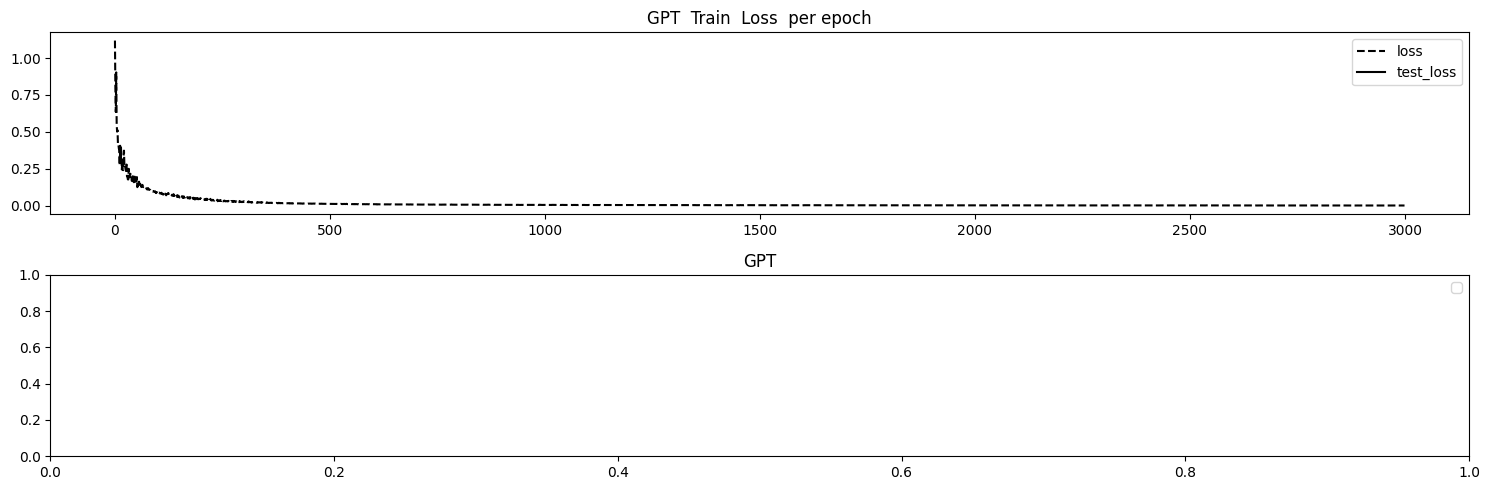

(15, 24)
(50, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])


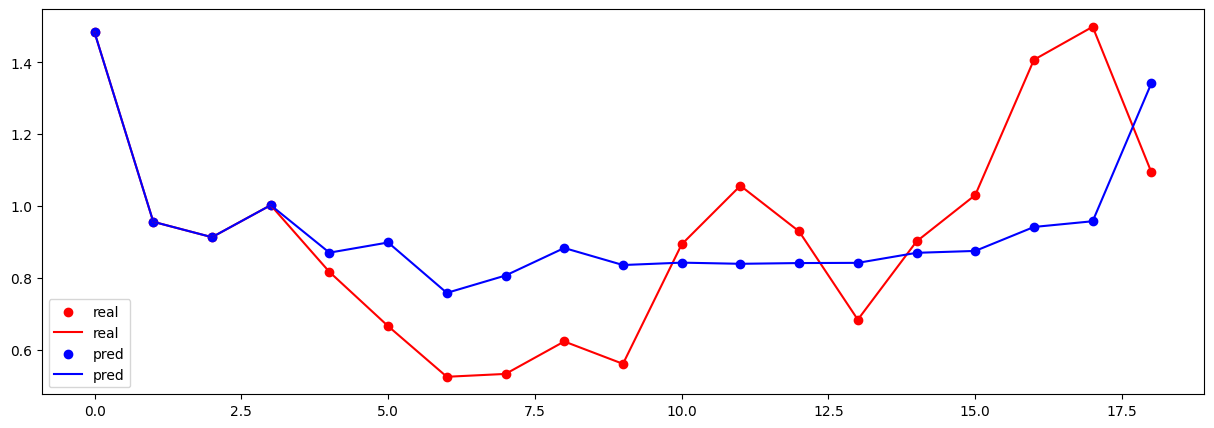

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(50, 24)
69


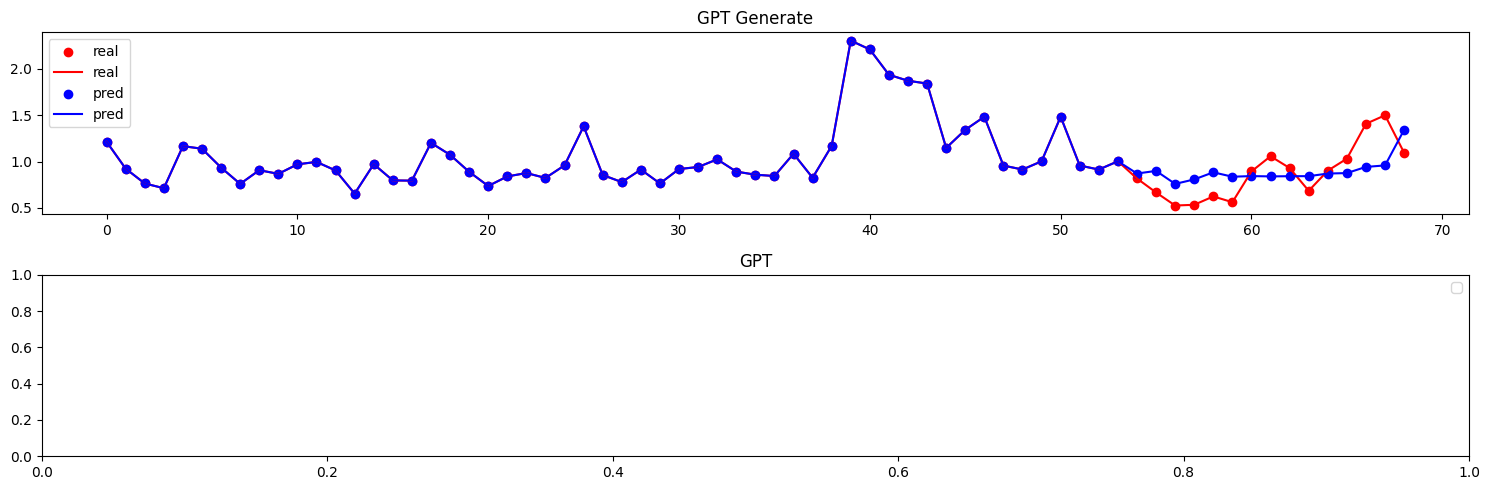

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([100, 24])
0 train loss =  0.9150655269622803
500 train loss =  0.027042945846915245
1000 train loss =  0.00954139232635498
1500 train loss =  0.005432994104921818
2000 train loss =  0.003997561987489462
2500 train loss =  0.002953201998025179


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


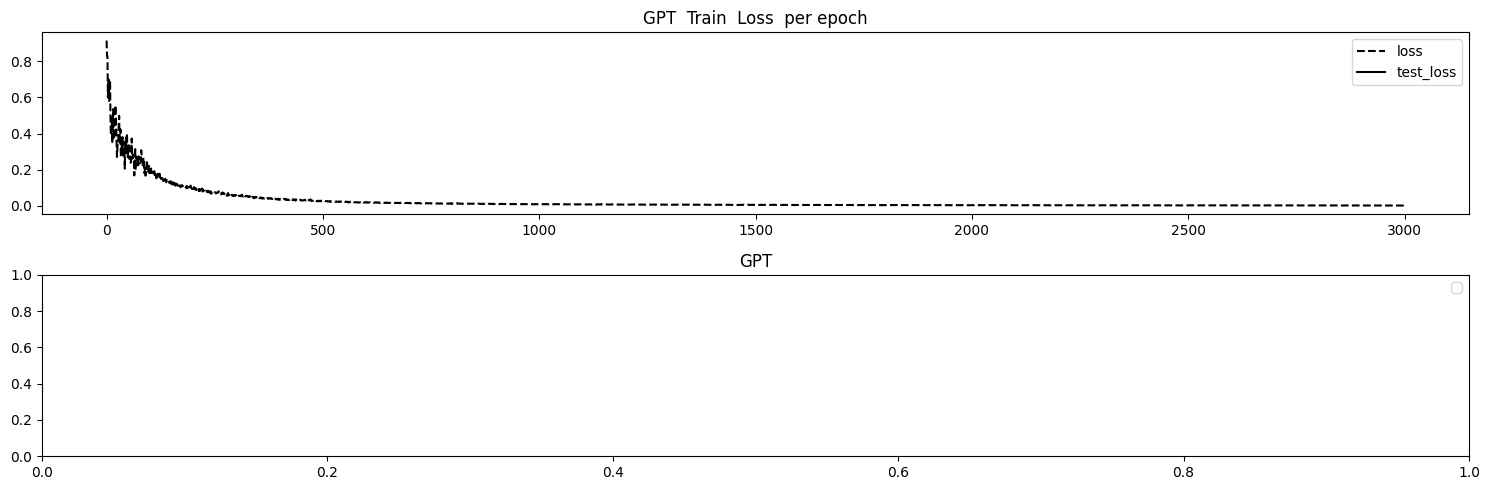

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

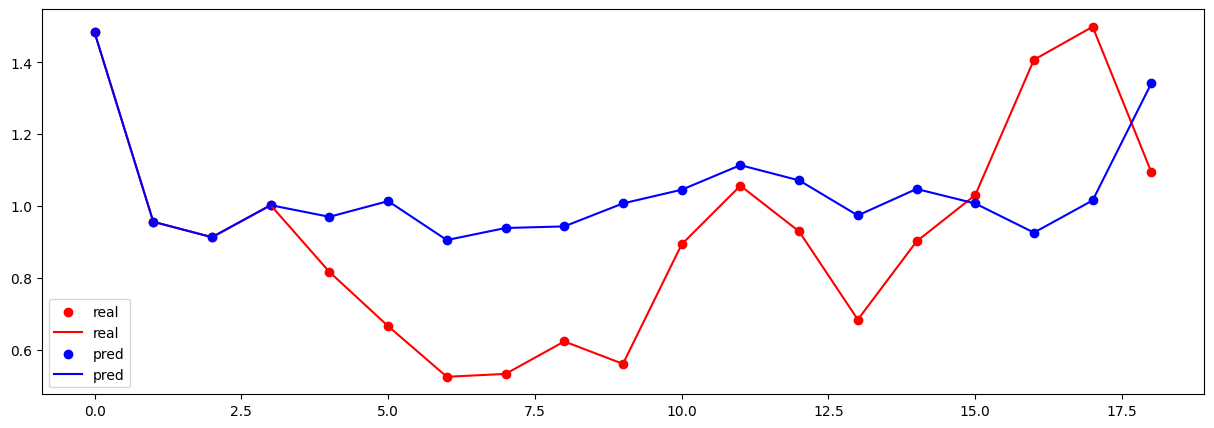

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


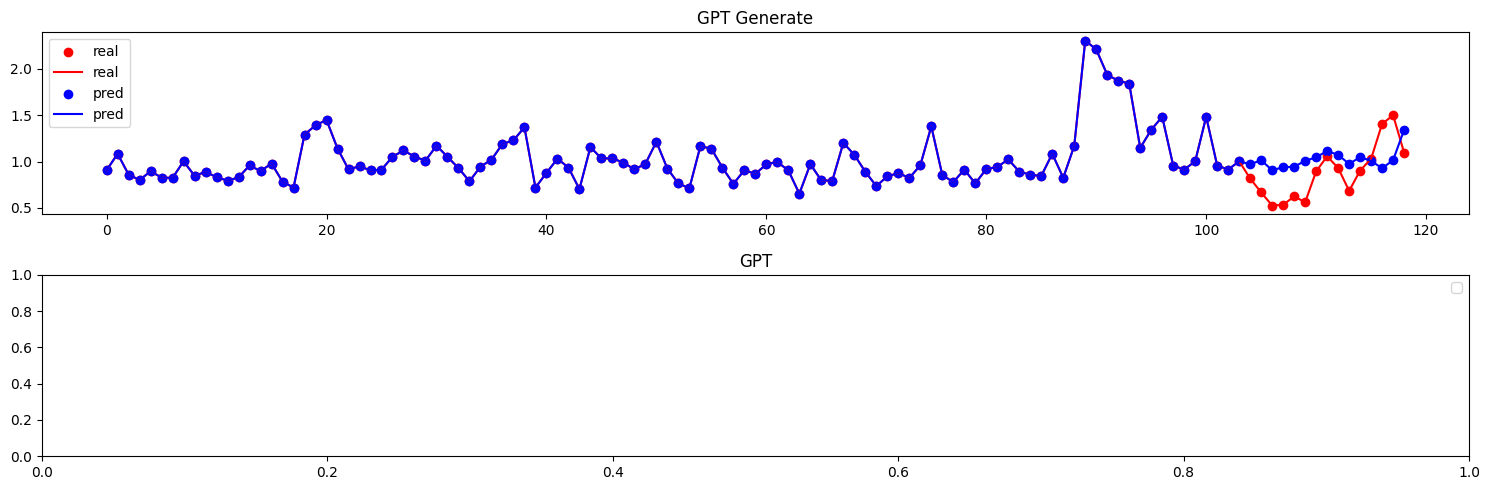

In [50]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([150, 24])
0 train loss =  1.3339251279830933
500 train loss =  0.03919841721653938
1000 train loss =  0.013323548249900341
1500 train loss =  0.0072164698503911495
2000 train loss =  0.005698948632925749
2500 train loss =  0.004054581746459007


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


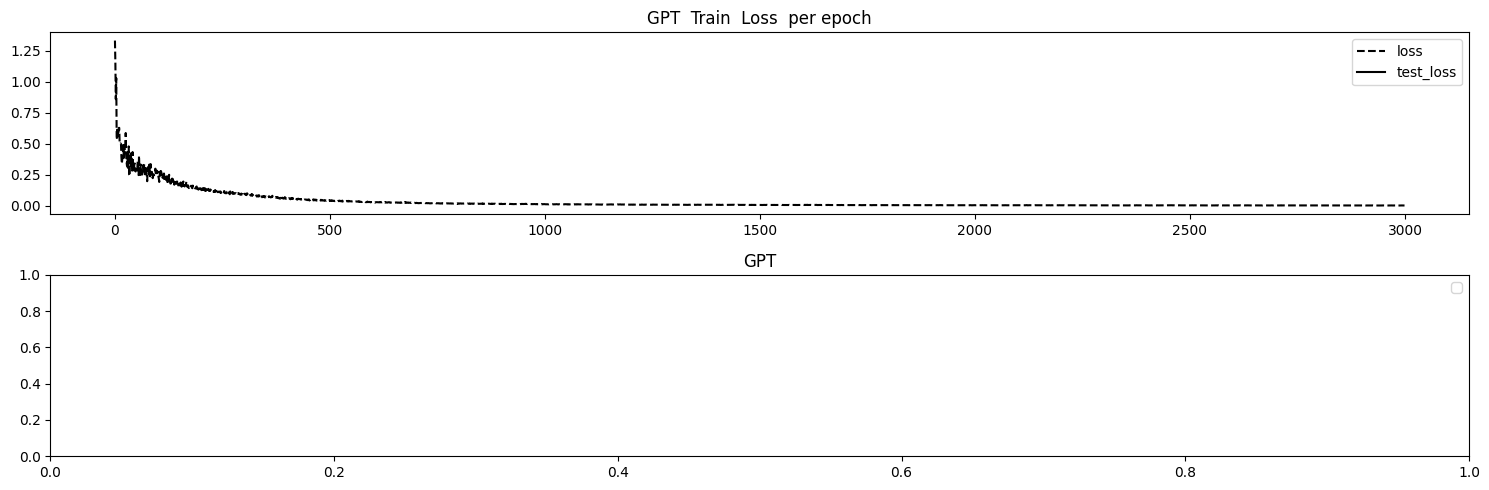

(15, 24)
(150, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

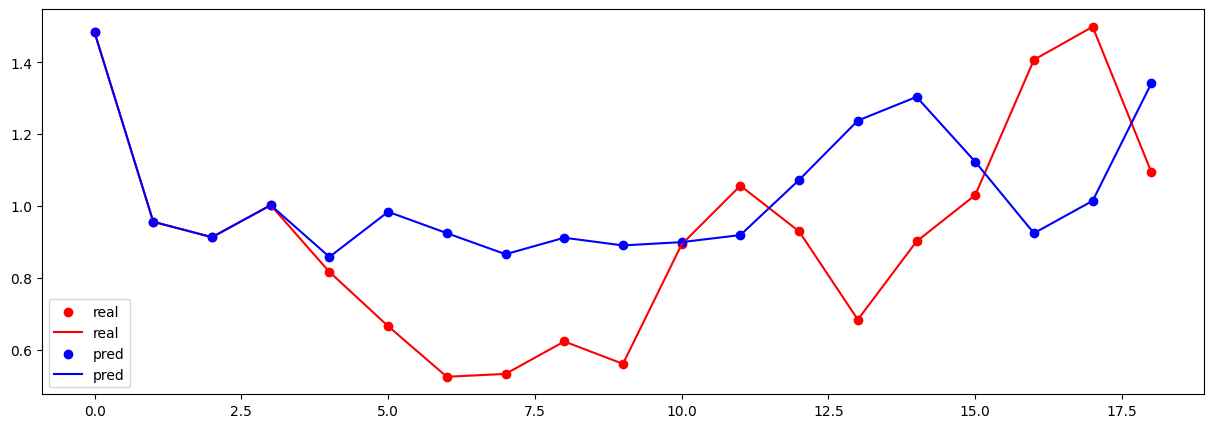

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(150, 24)
169


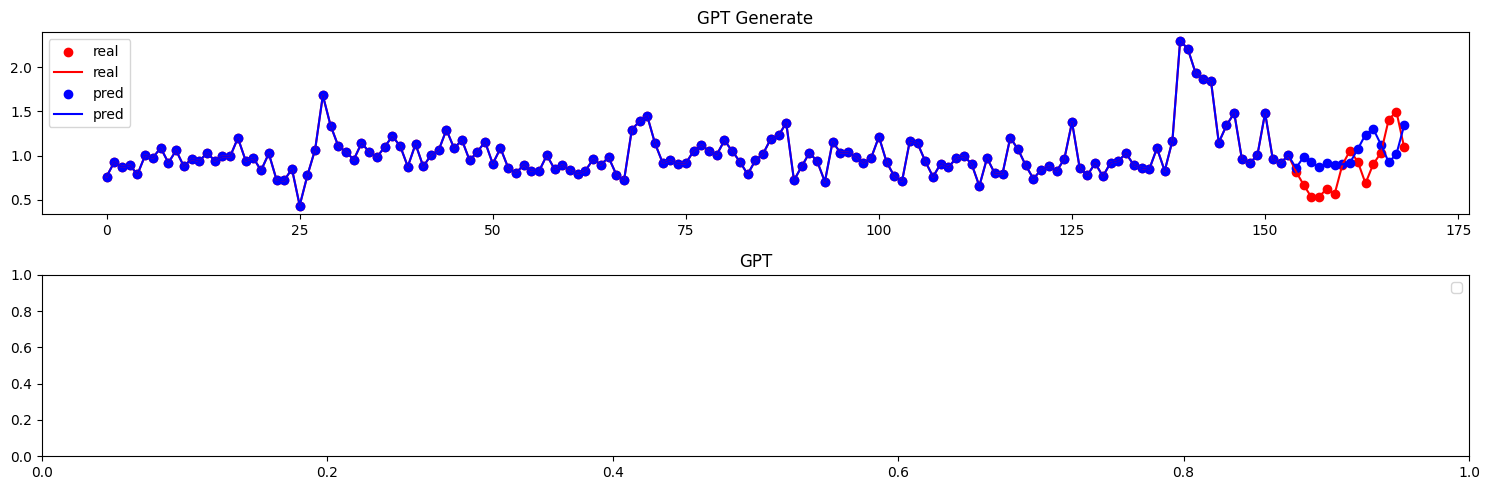

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([200, 24])
0 train loss =  0.9528834223747253
500 train loss =  0.05361626669764519
1000 train loss =  0.015573821030557156
1500 train loss =  0.009268763475120068
2000 train loss =  0.0061050462536513805
2500 train loss =  0.005096137523651123


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


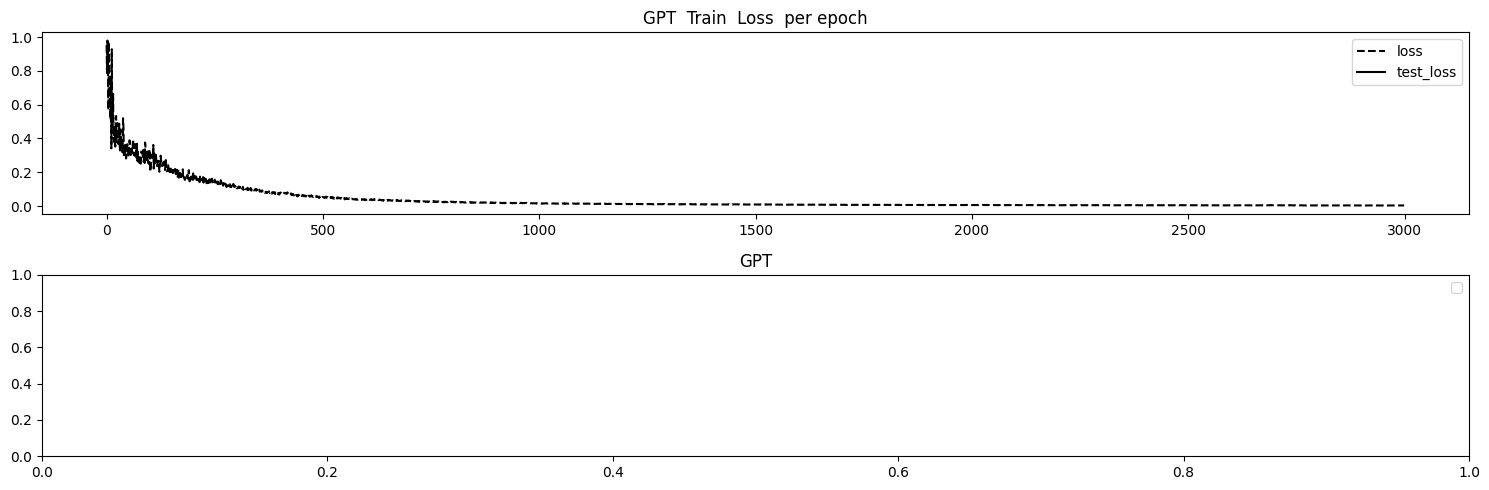

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

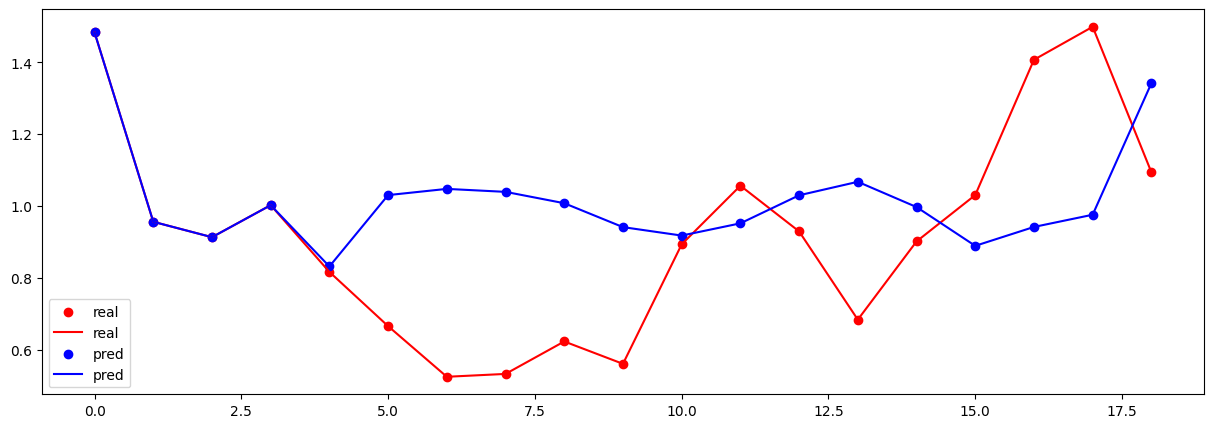

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(200, 24)
219


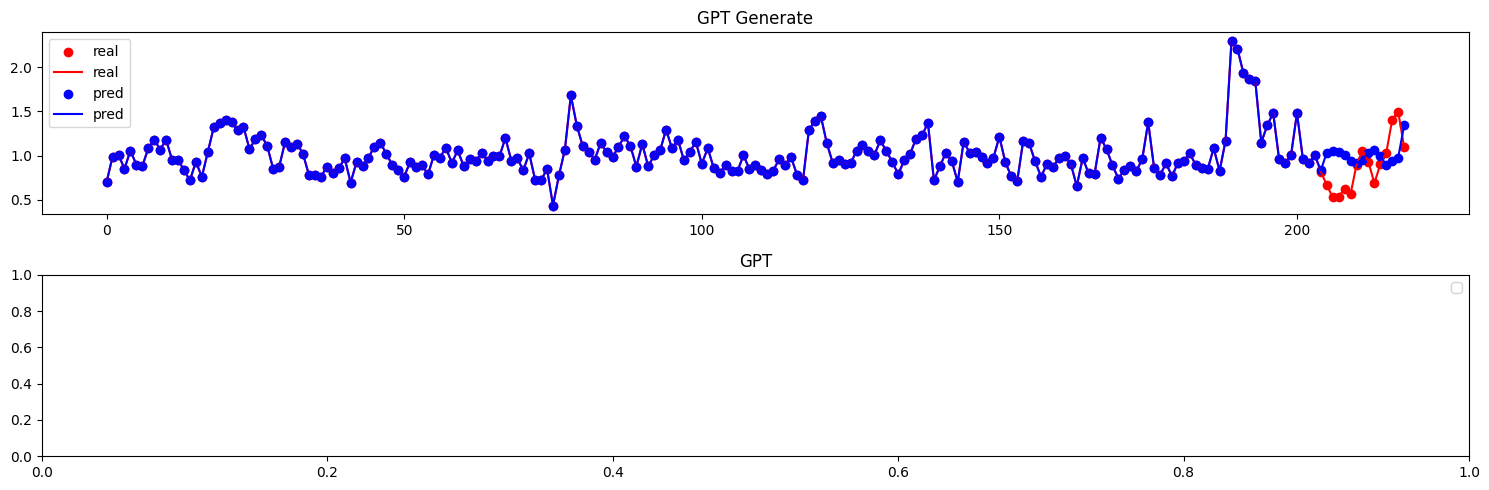

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 2


In [53]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 150  :  ] 
chunk200to400_train = train_CIVS[ 100  :  ]  
chunk100to400_train = train_CIVS[  50  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )





1383
144
359
15
(50, 24)
(100, 24)
(150, 24)
(200, 24)


torch.Size([50, 24])
0 train loss =  1.1479893922805786
500 train loss =  0.011046192608773708
1000 train loss =  0.005338828079402447
1500 train loss =  0.003255783347412944
2000 train loss =  0.0021799190435558558
2500 train loss =  0.0017121878918260336


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


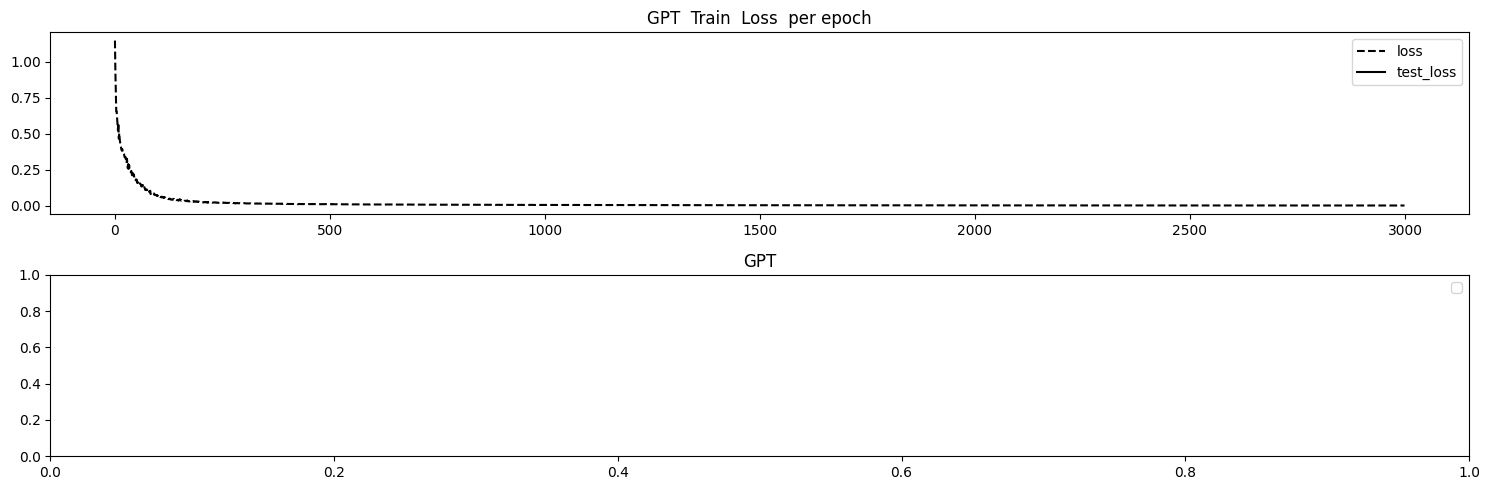

(15, 24)
(50, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])


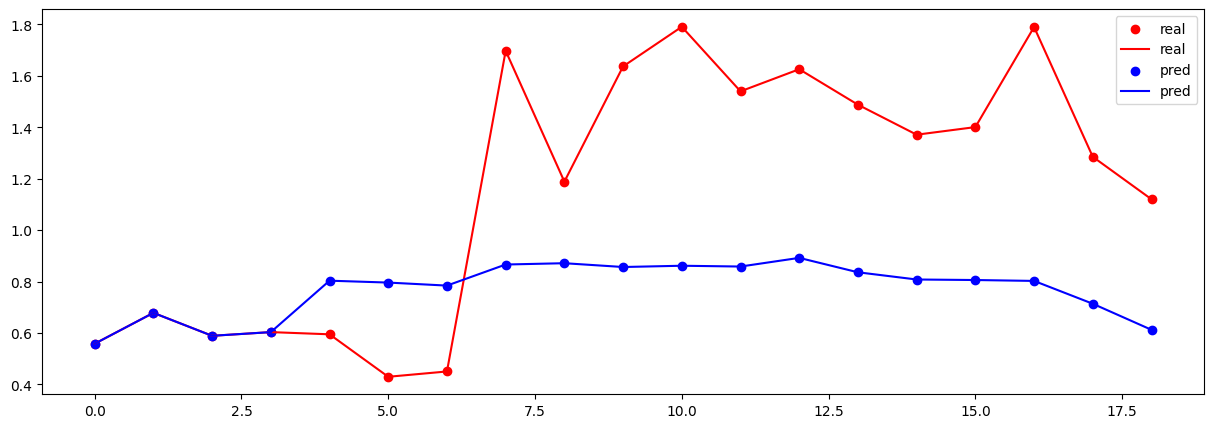

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(50, 24)
69


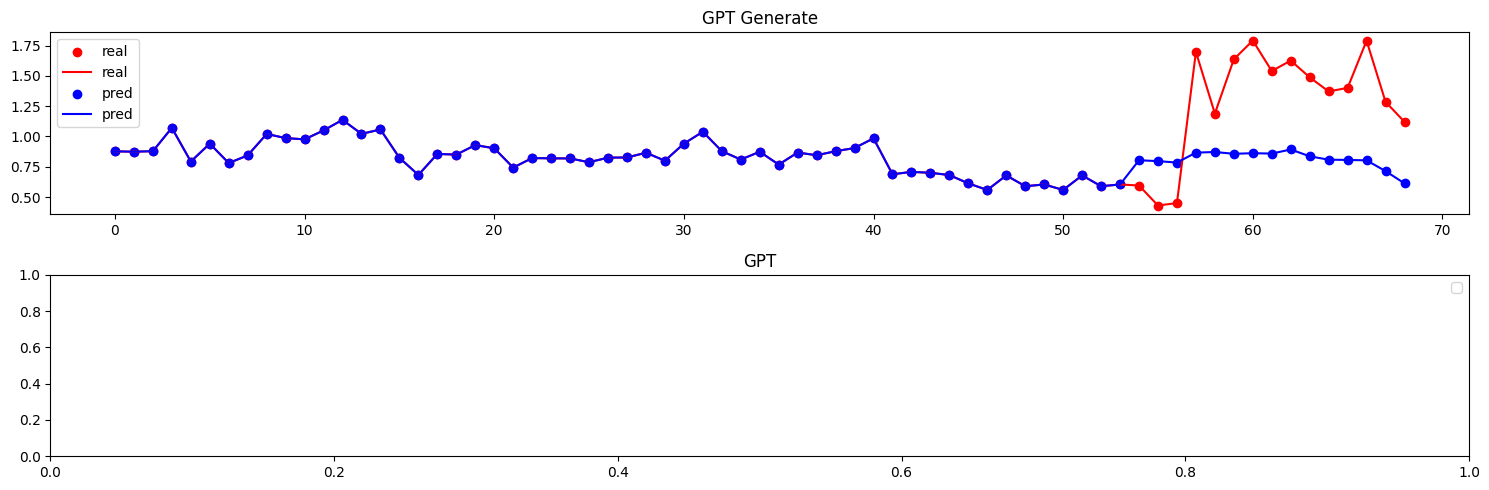

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([100, 24])
0 train loss =  1.1308114528656006
500 train loss =  0.0187071580439806
1000 train loss =  0.007955692708492279
1500 train loss =  0.0056064859963953495
2000 train loss =  0.0036493130028247833
2500 train loss =  0.0025769935455173254


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


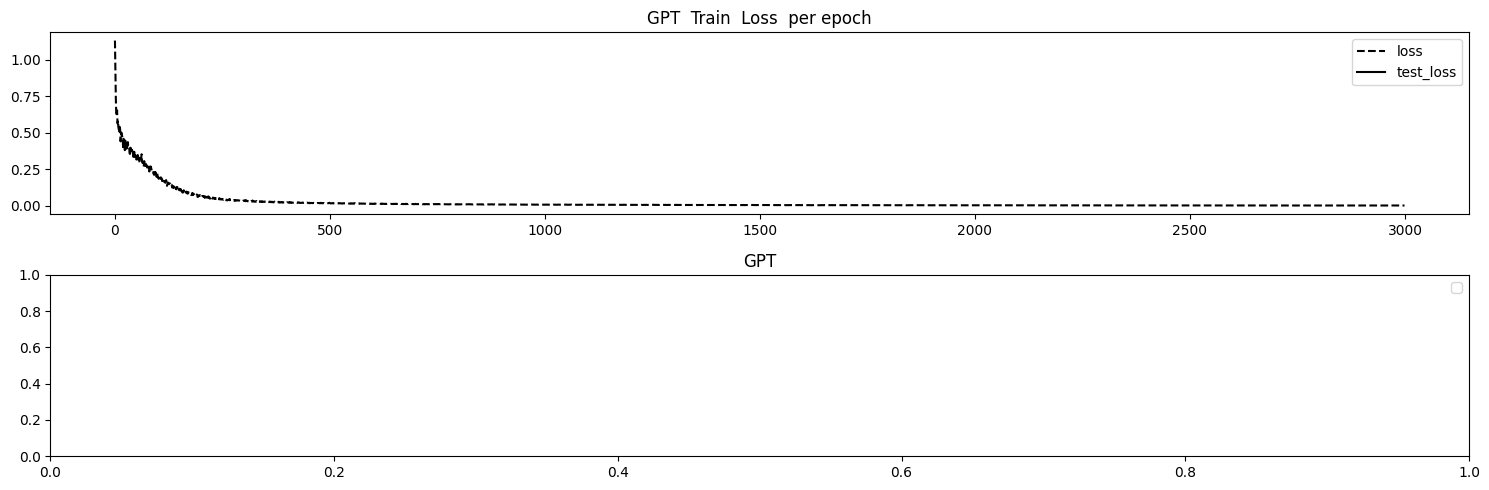

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

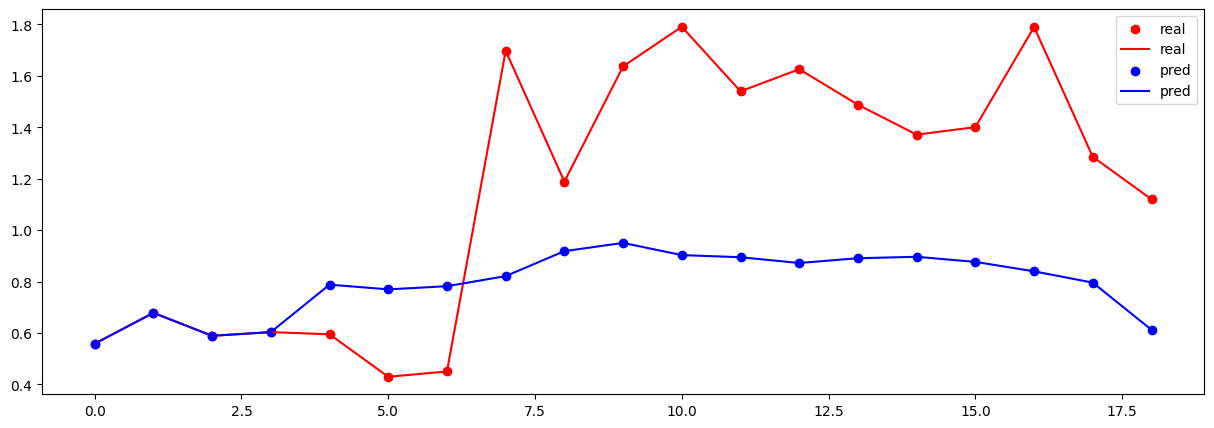

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


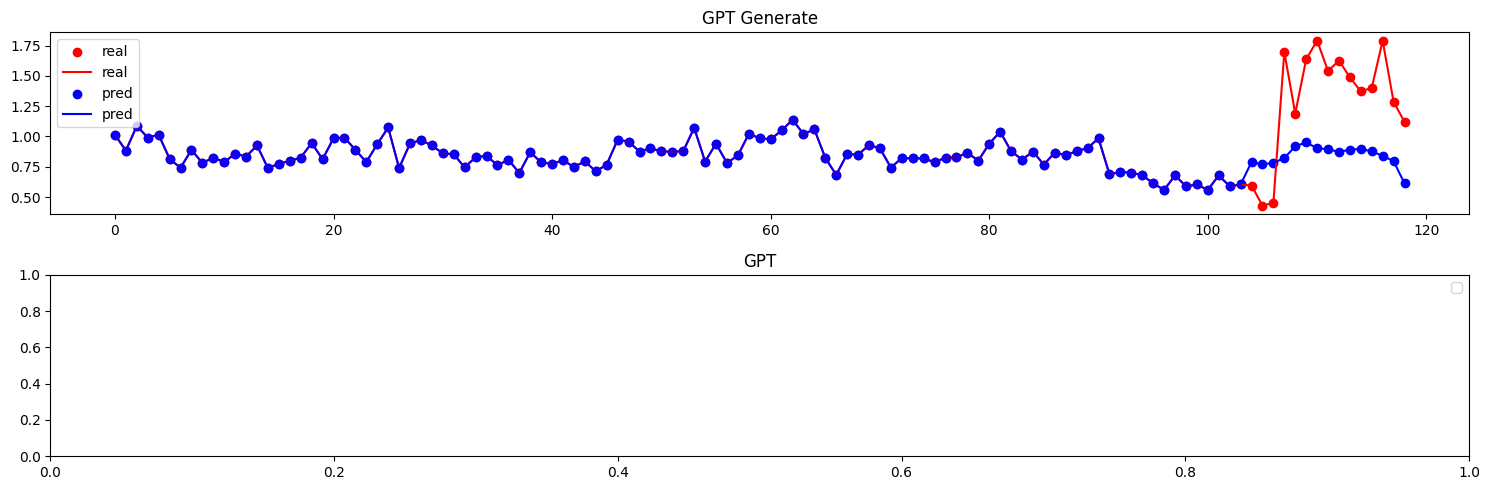

In [55]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([150, 24])
0 train loss =  1.1539182662963867
500 train loss =  0.046908166259527206
1000 train loss =  0.01393775176256895
1500 train loss =  0.007178331725299358
2000 train loss =  0.006072457879781723
2500 train loss =  0.0034913686104118824


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


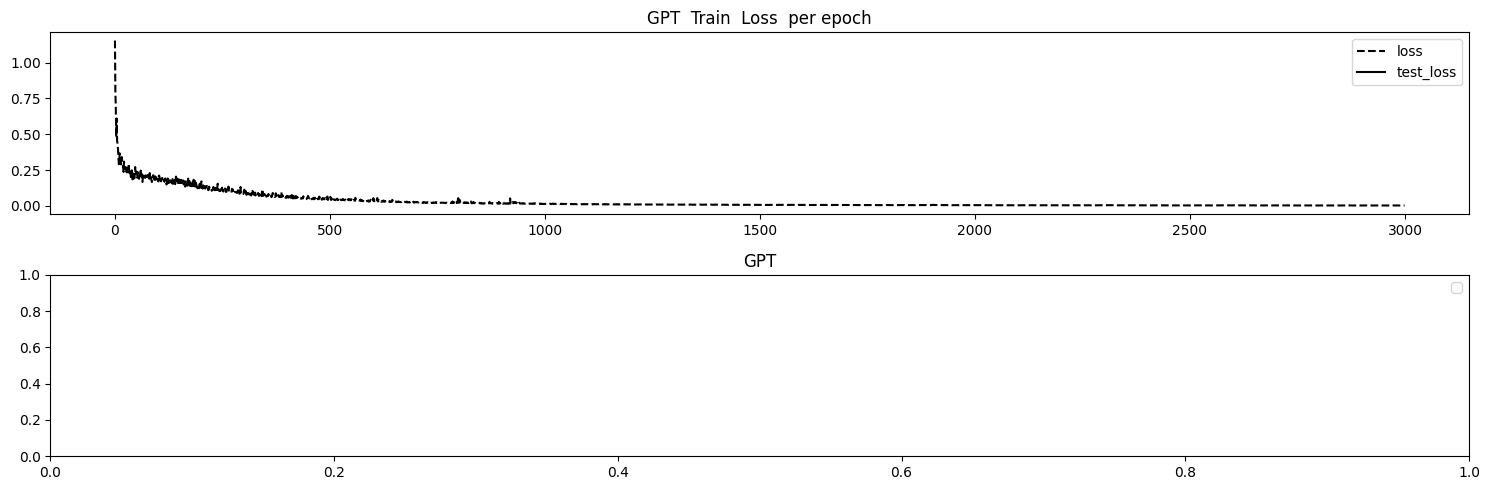

(15, 24)
(150, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

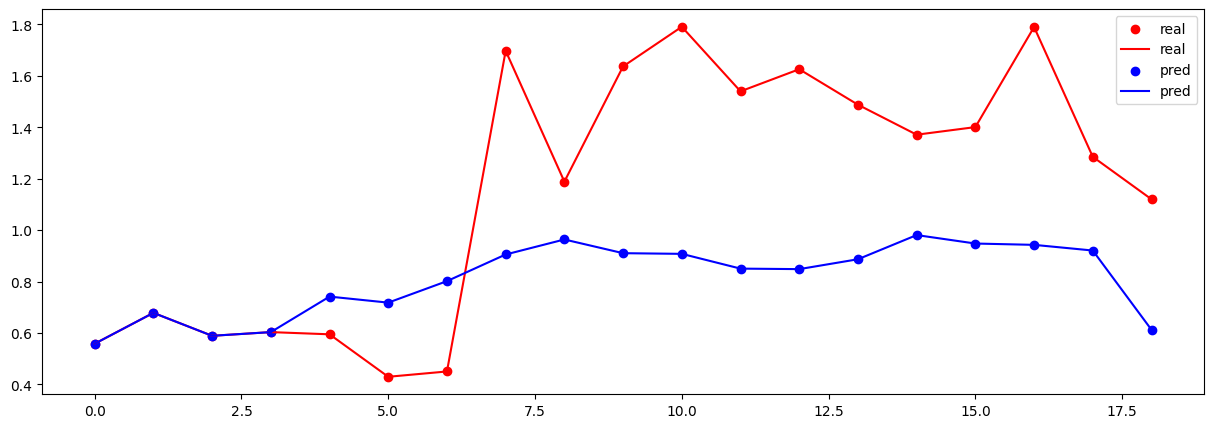

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(150, 24)
169


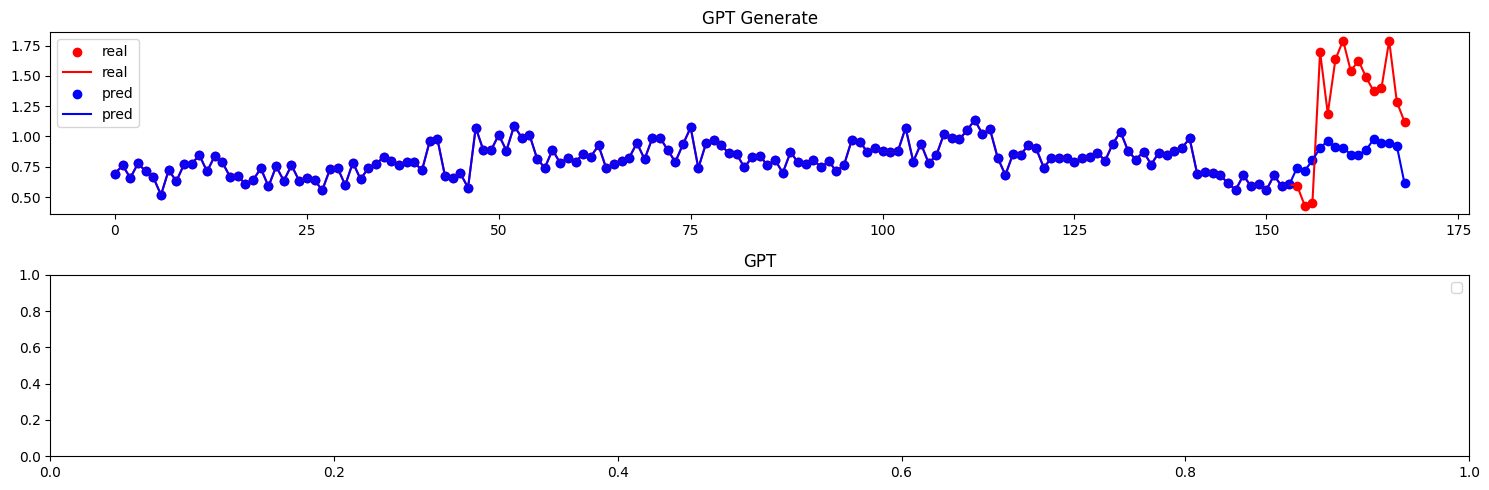

In [56]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([200, 24])
0 train loss =  1.2030978202819824
500 train loss =  0.06633059680461884
1000 train loss =  0.021890131756663322
1500 train loss =  0.009577934630215168
2000 train loss =  0.0065525248646736145
2500 train loss =  0.004451944958418608


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


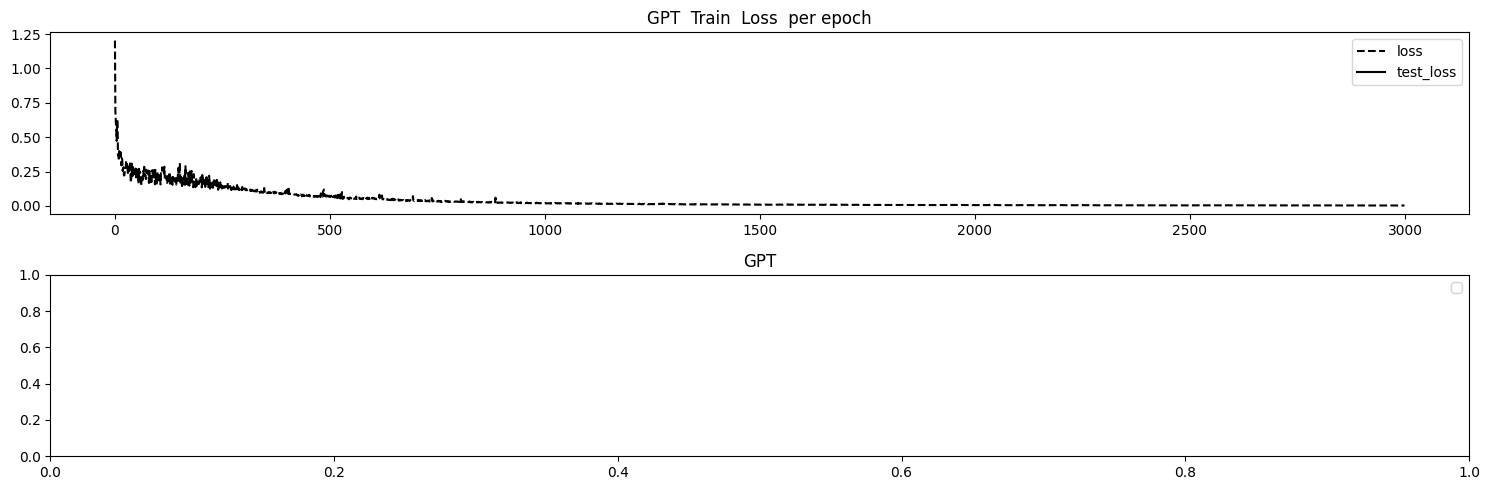

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

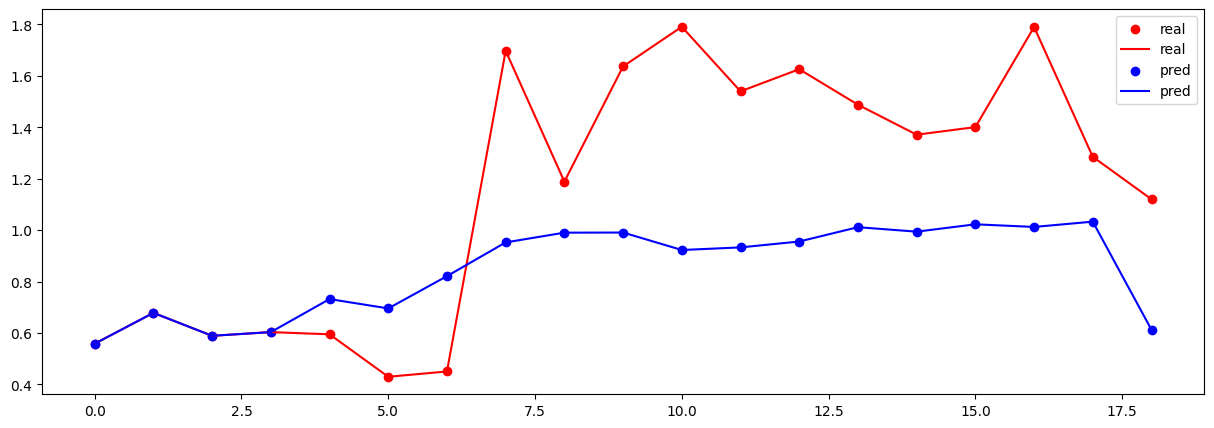

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(200, 24)
219


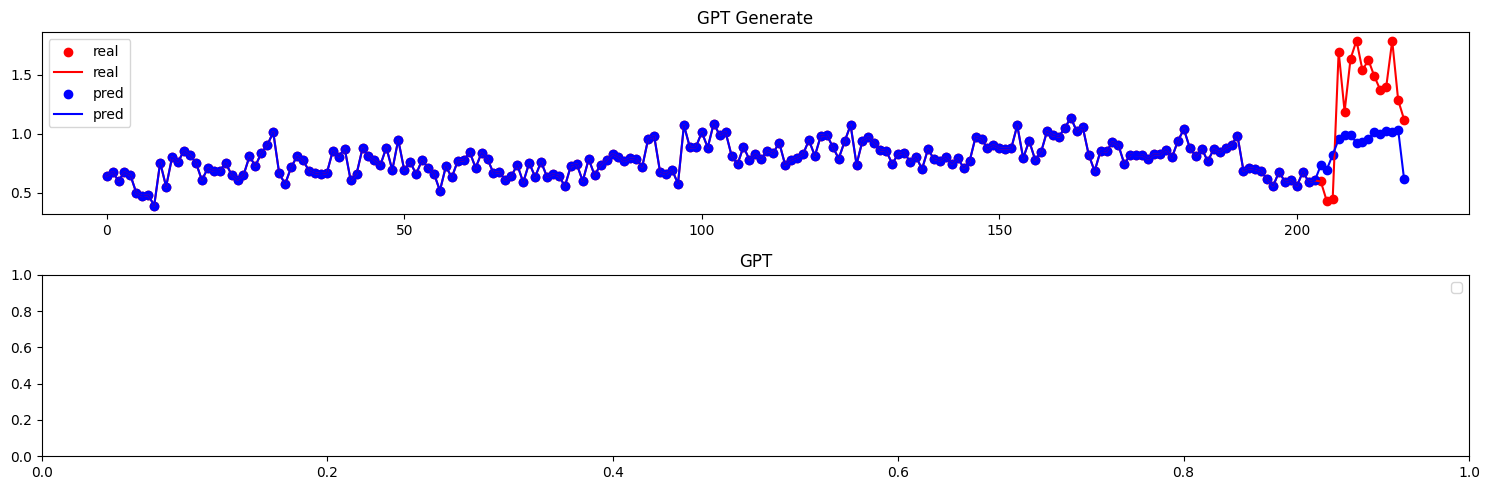

In [57]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 3


In [58]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 150  :  ] 
chunk200to400_train = train_CIVS[ 100  :  ]  
chunk100to400_train = train_CIVS[  50  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )



1383
1109
1324
15
(50, 24)
(100, 24)
(150, 24)
(200, 24)


torch.Size([50, 24])
0 train loss =  1.1711801290512085
500 train loss =  0.013170196674764156
1000 train loss =  0.006103267893195152
1500 train loss =  0.0038808889221400023
2000 train loss =  0.0026240285951644182
2500 train loss =  0.001934026600793004


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


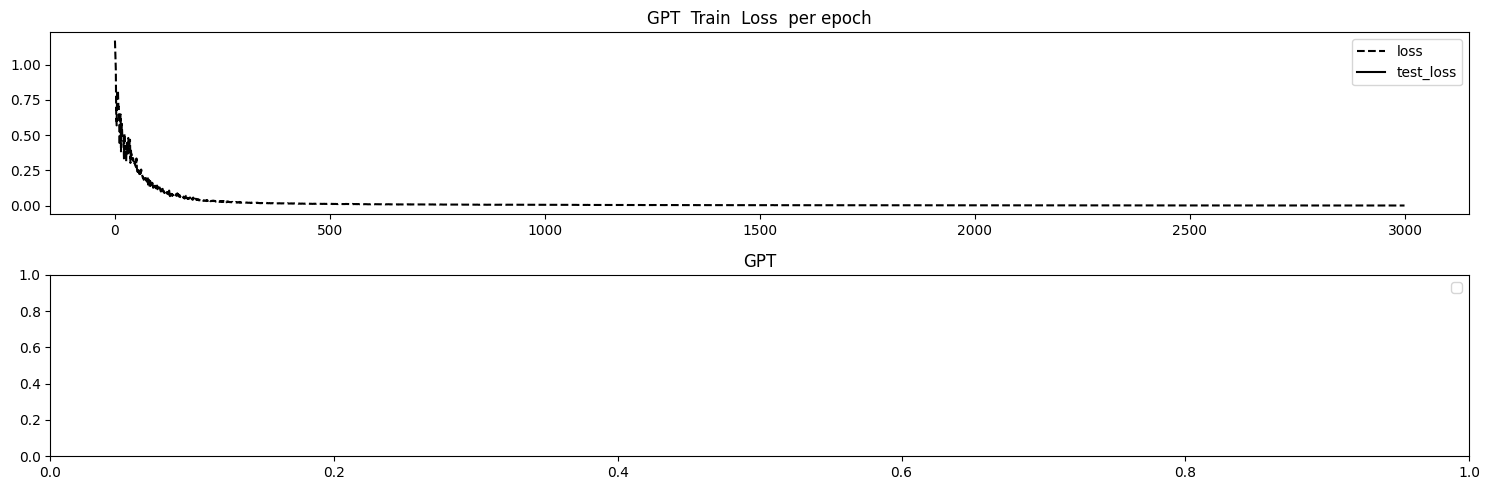

(15, 24)
(50, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])


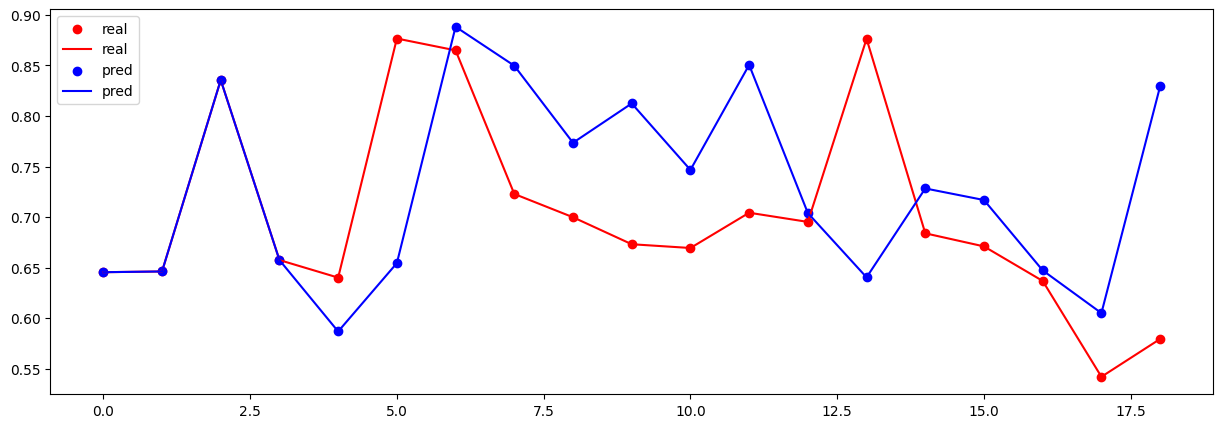

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(50, 24)
69


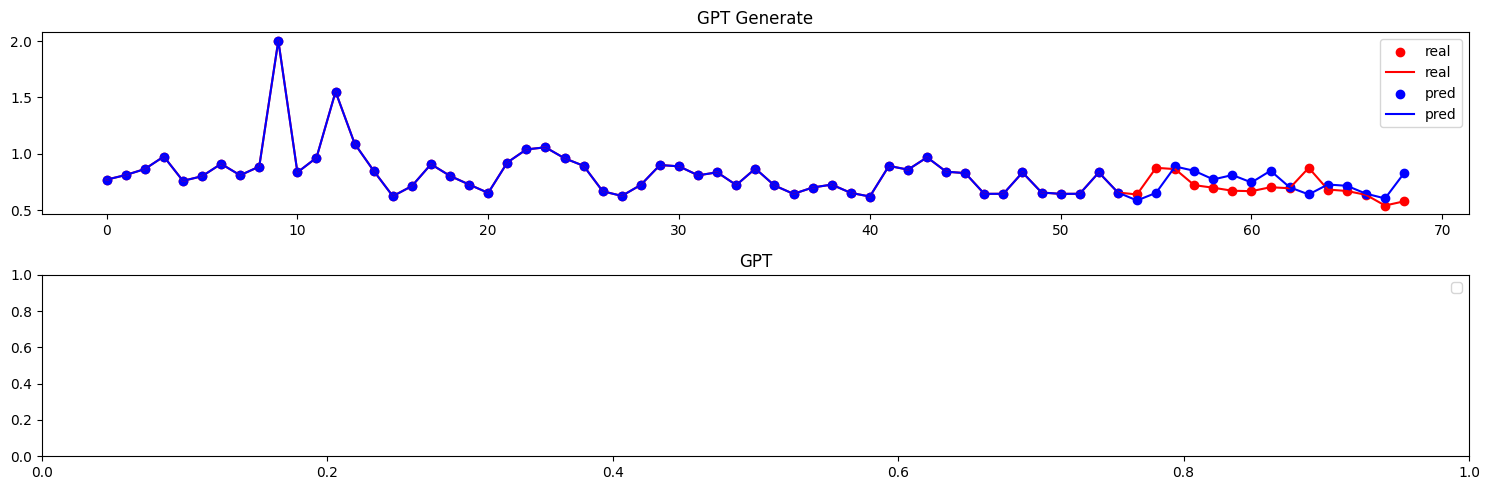

In [59]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([100, 24])
0 train loss =  1.3549875020980835
500 train loss =  0.02352817729115486
1000 train loss =  0.009356236085295677
1500 train loss =  0.006123699247837067
2000 train loss =  0.004613307770341635
2500 train loss =  0.003226785222068429


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


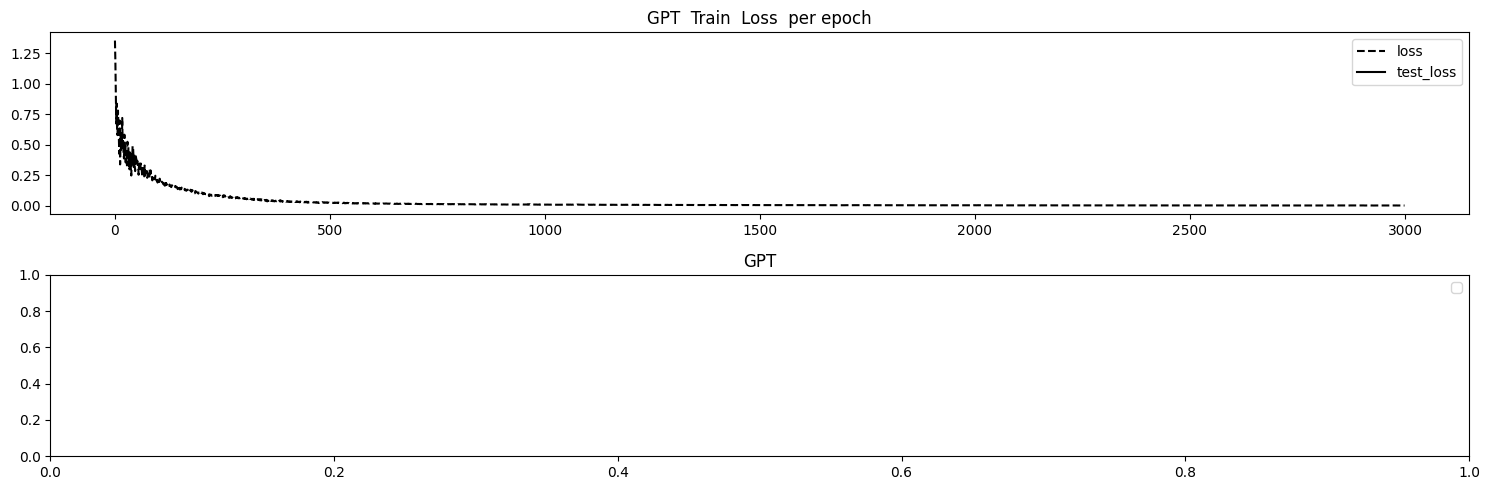

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

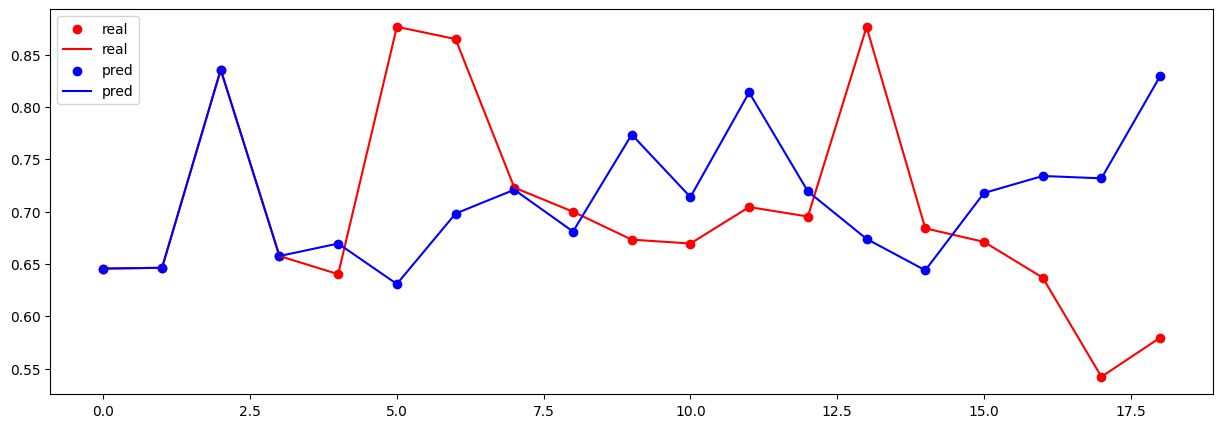

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


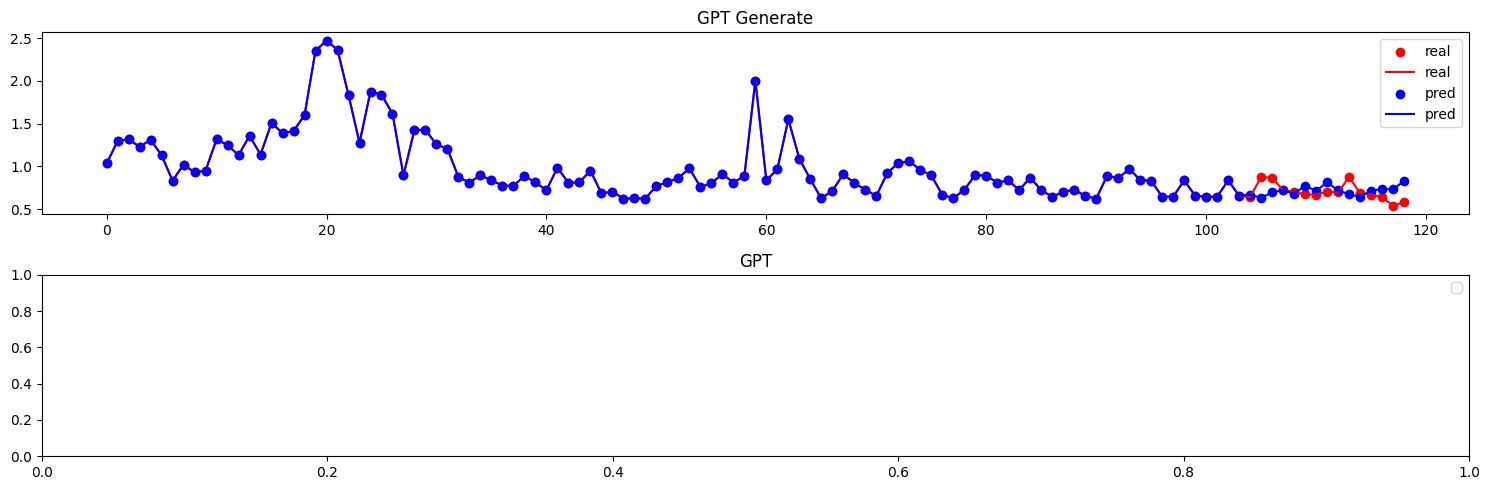

In [60]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([150, 24])
0 train loss =  0.9792972207069397
500 train loss =  0.03946559876203537
1000 train loss =  0.01352392602711916
1500 train loss =  0.008176585659384727
2000 train loss =  0.005605082027614117
2500 train loss =  0.004268561024218798


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


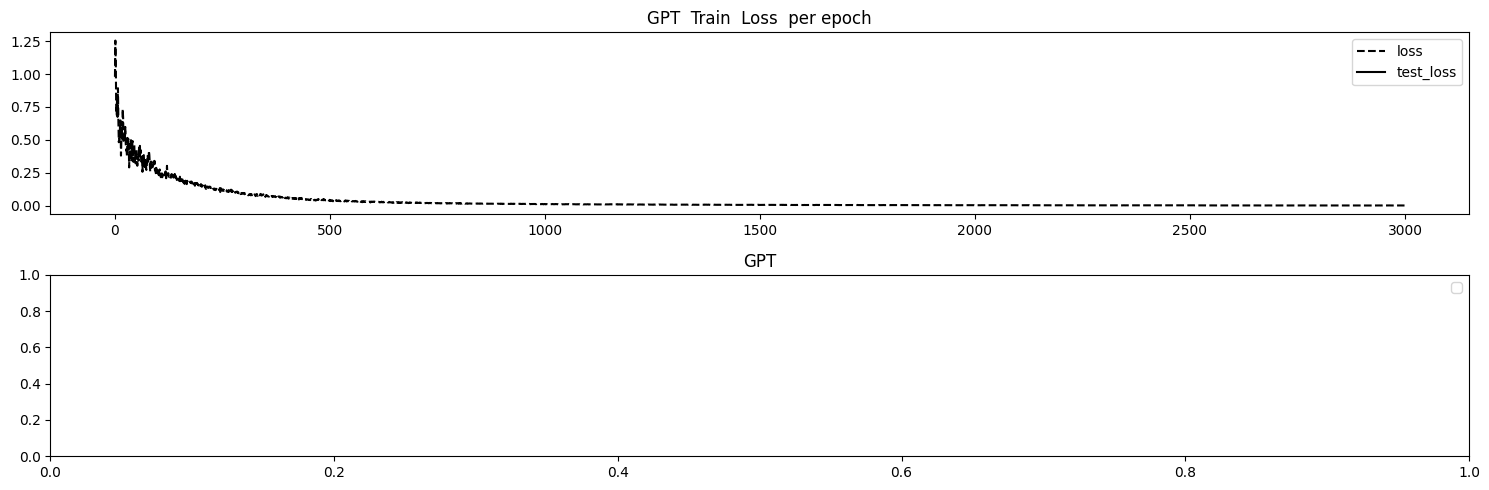

(15, 24)
(150, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

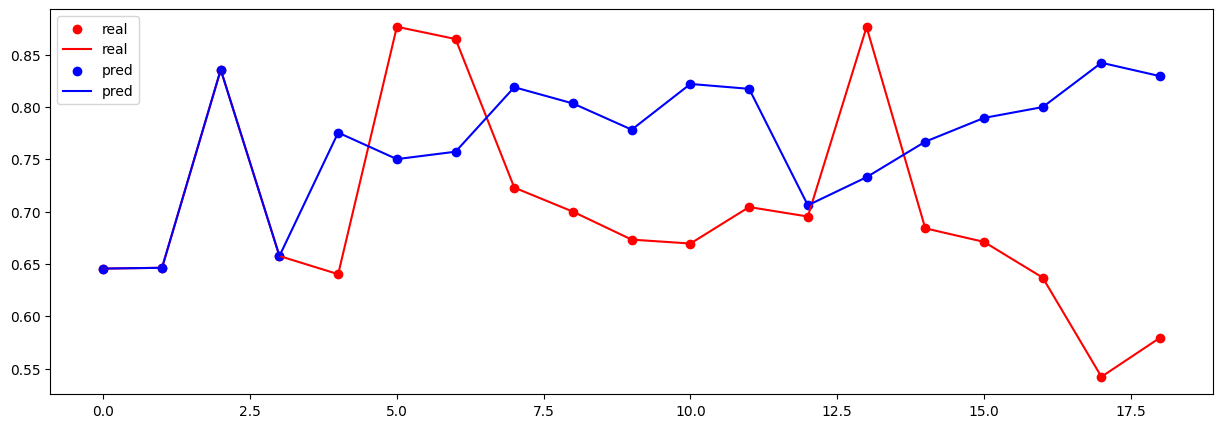

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(150, 24)
169


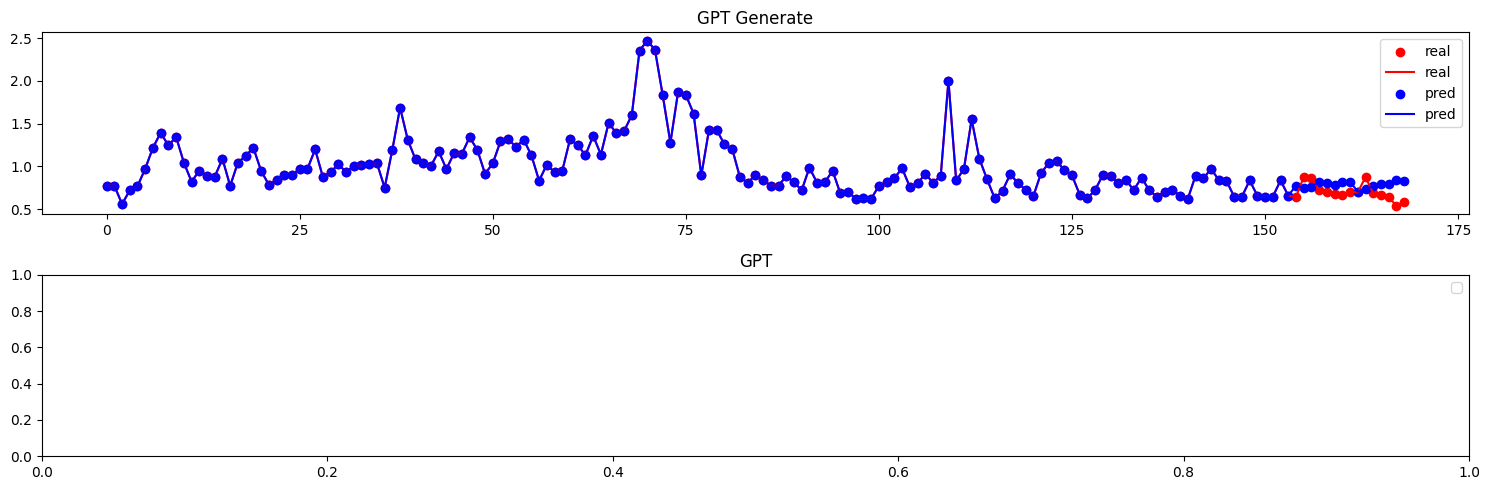

In [61]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([200, 24])
0 train loss =  1.208266258239746
500 train loss =  0.05870286375284195
1000 train loss =  0.0195306409150362
1500 train loss =  0.01001768559217453
2000 train loss =  0.006155615672469139
2500 train loss =  0.005132272839546204


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


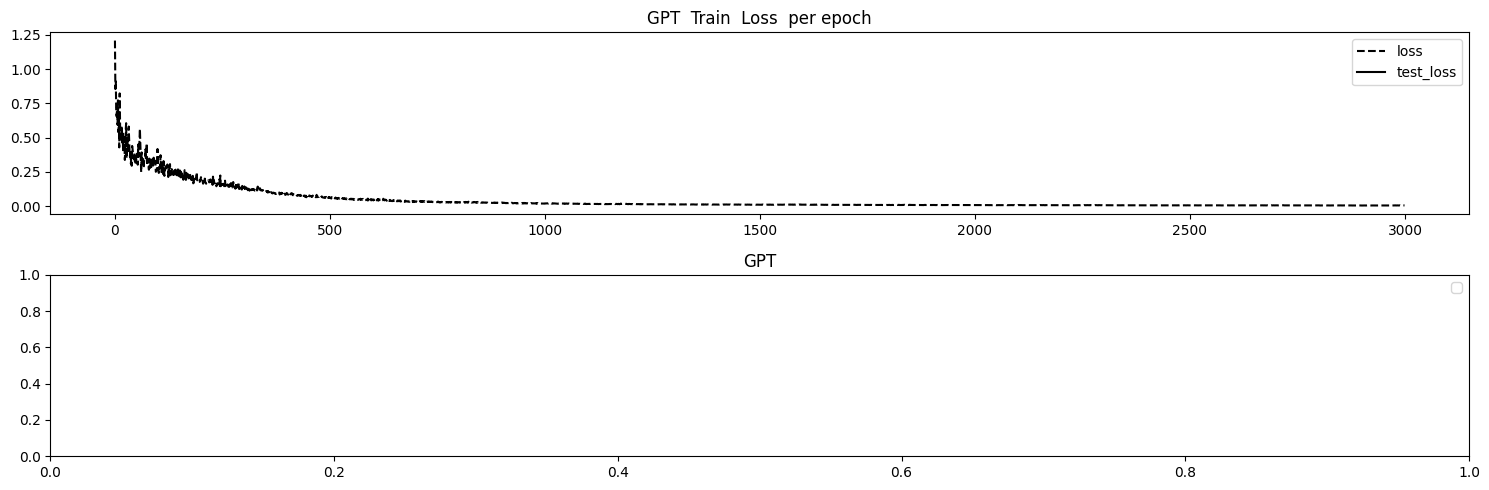

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

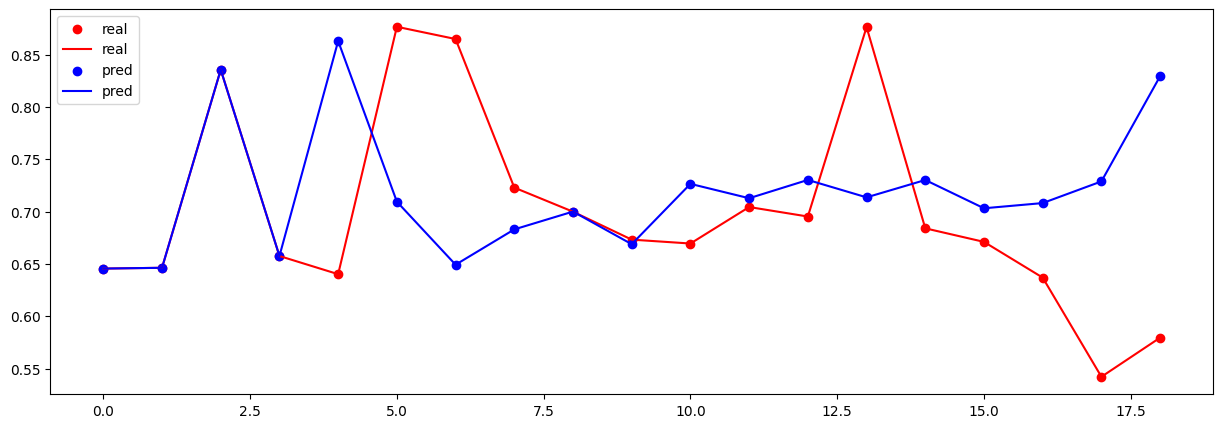

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(200, 24)
219


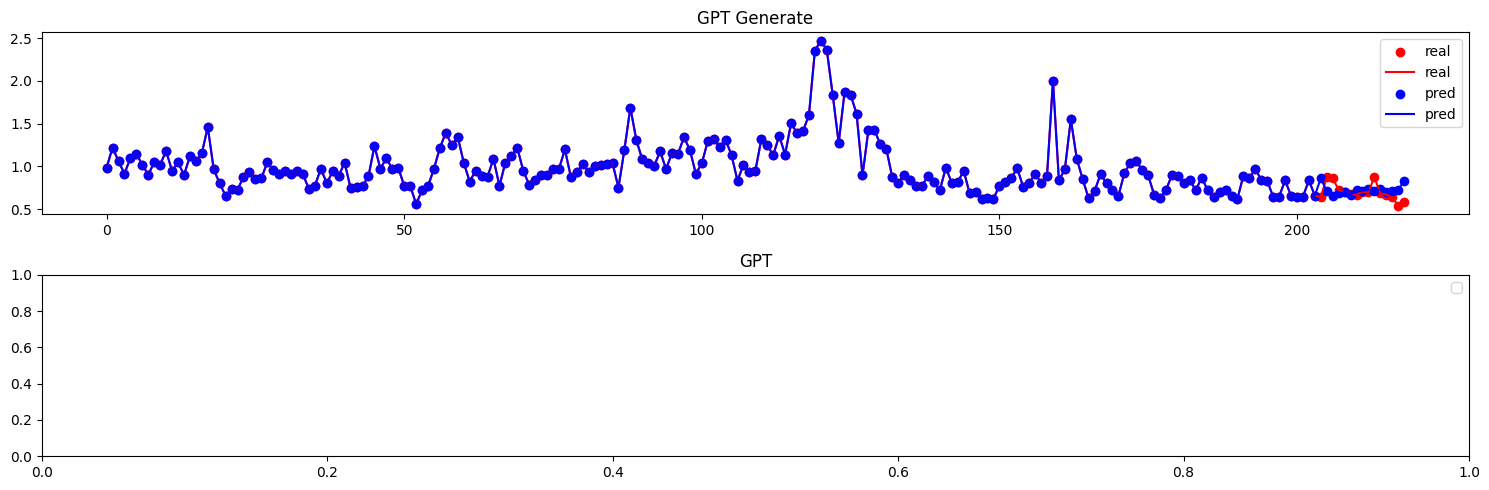

In [62]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 4


In [63]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 150  :  ] 
chunk200to400_train = train_CIVS[ 100  :  ]  
chunk100to400_train = train_CIVS[  50  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


1383
183
398
15
(50, 24)
(100, 24)
(150, 24)
(200, 24)


torch.Size([50, 24])
0 train loss =  1.2772636413574219
500 train loss =  0.012082494795322418
1000 train loss =  0.005436012055724859
1500 train loss =  0.0032281544990837574
2000 train loss =  0.0023638647980988026
2500 train loss =  0.0016288035549223423


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


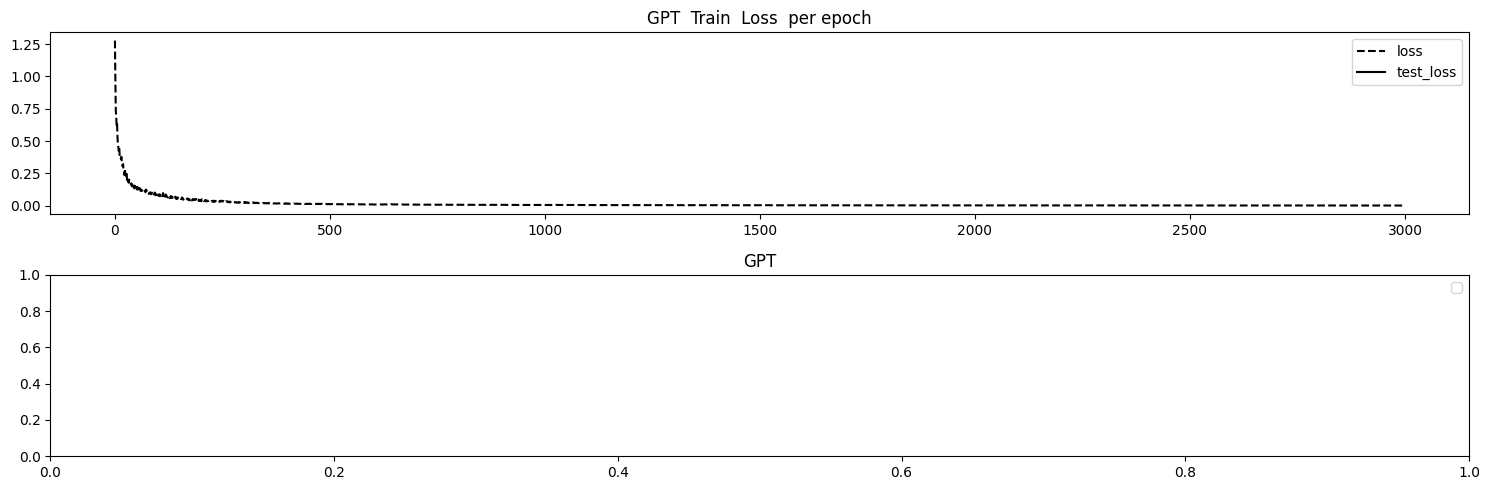

(15, 24)
(50, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])


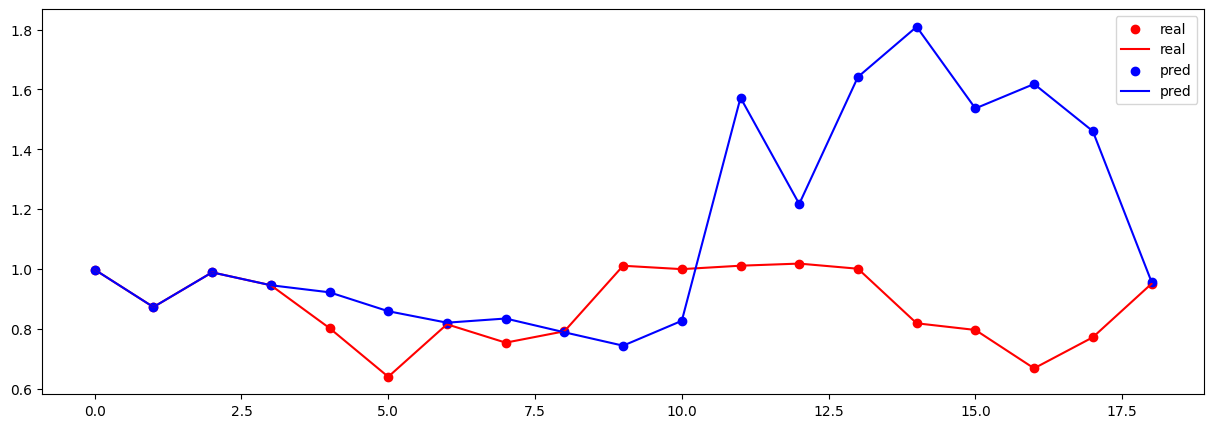

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(50, 24)
69


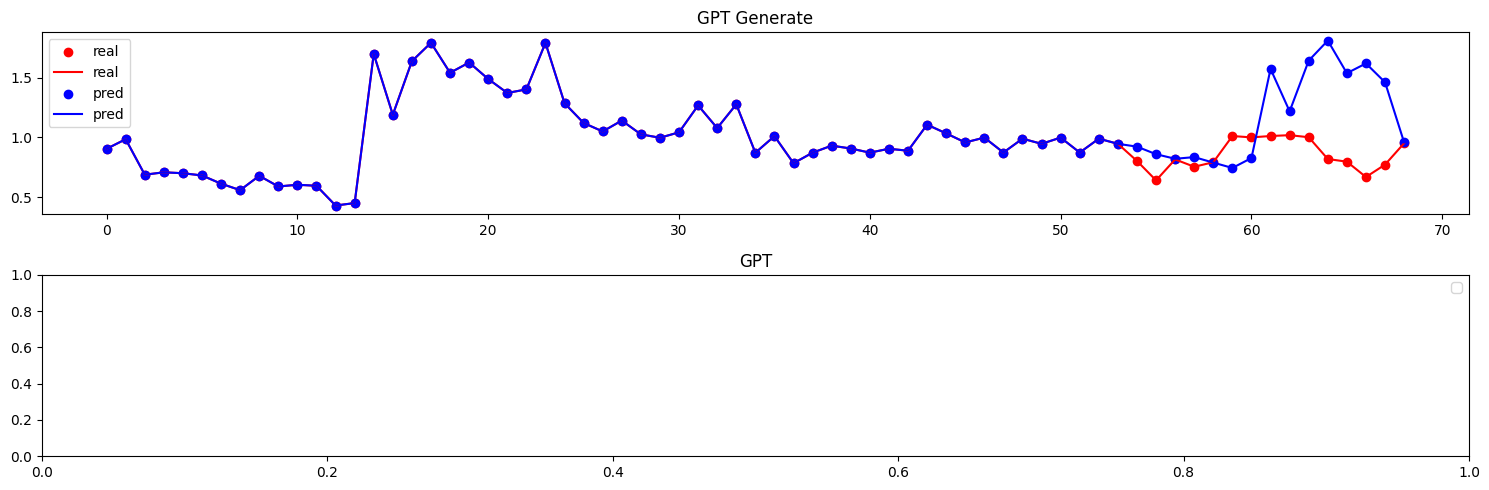

In [64]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([100, 24])
0 train loss =  1.2551095485687256
500 train loss =  0.024536658078432083
1000 train loss =  0.009510048665106297
1500 train loss =  0.0058623552322387695
2000 train loss =  0.003983944654464722
2500 train loss =  0.0029778731986880302


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


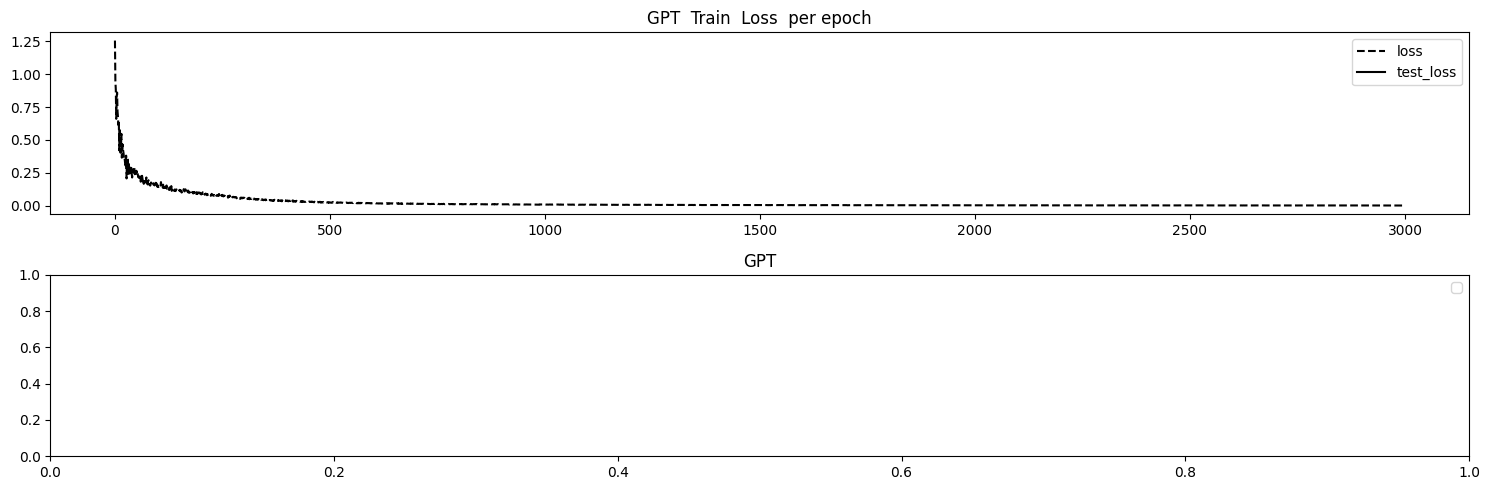

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

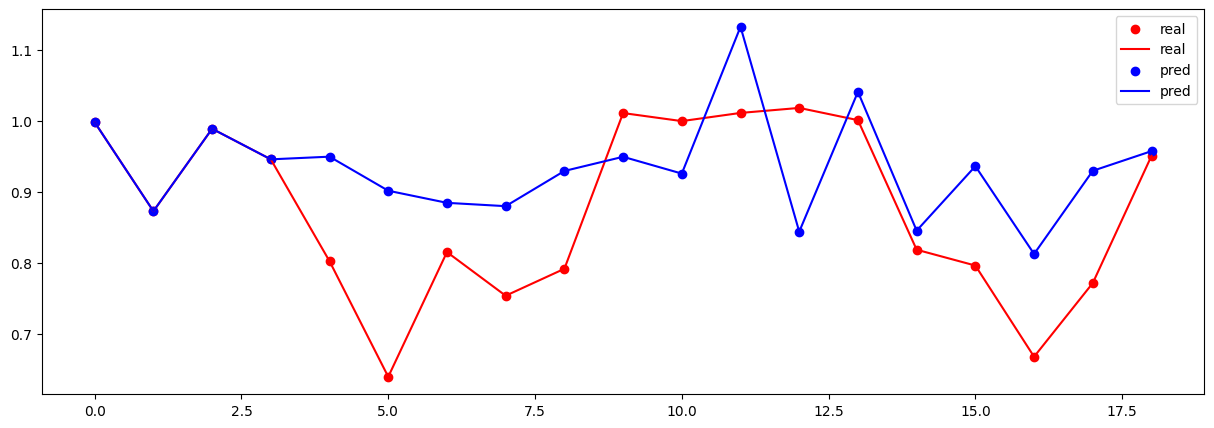

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


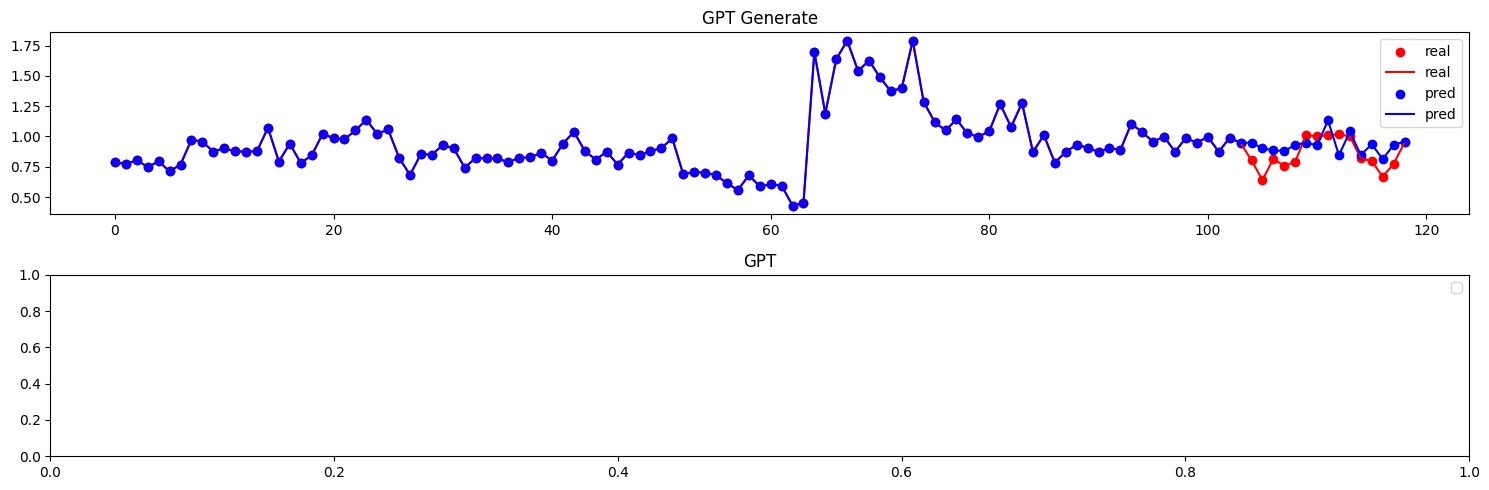

In [65]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([150, 24])
0 train loss =  1.7693142890930176
500 train loss =  0.046065788716077805
1000 train loss =  0.014170818962156773
1500 train loss =  0.007556497119367123
2000 train loss =  0.00488873478025198
2500 train loss =  0.004149045329540968


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


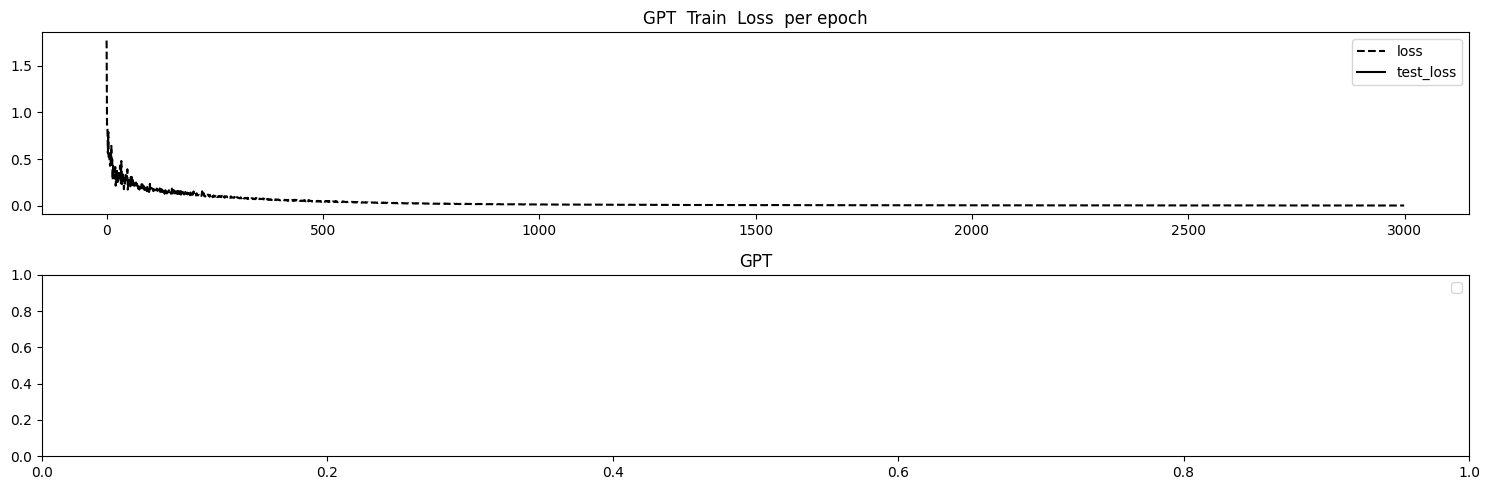

(15, 24)
(150, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

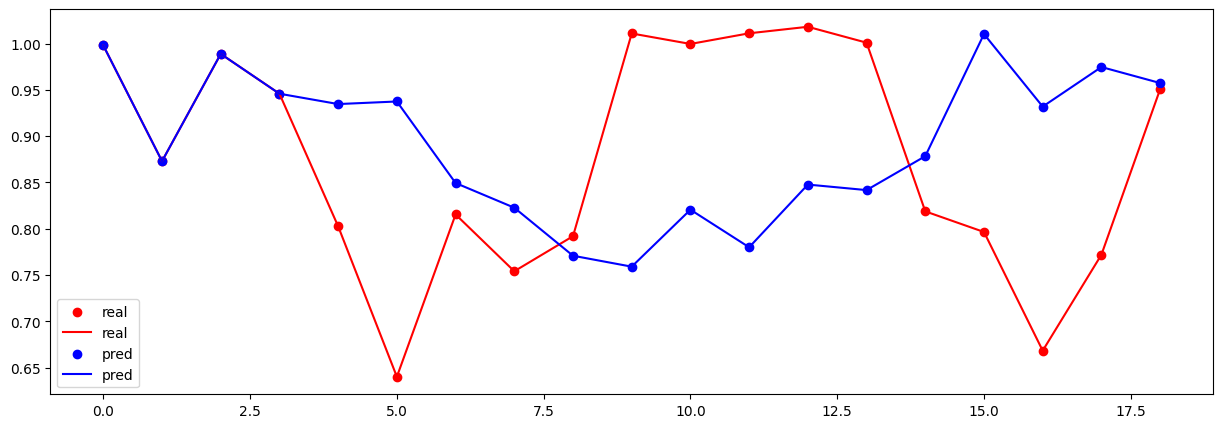

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(150, 24)
169


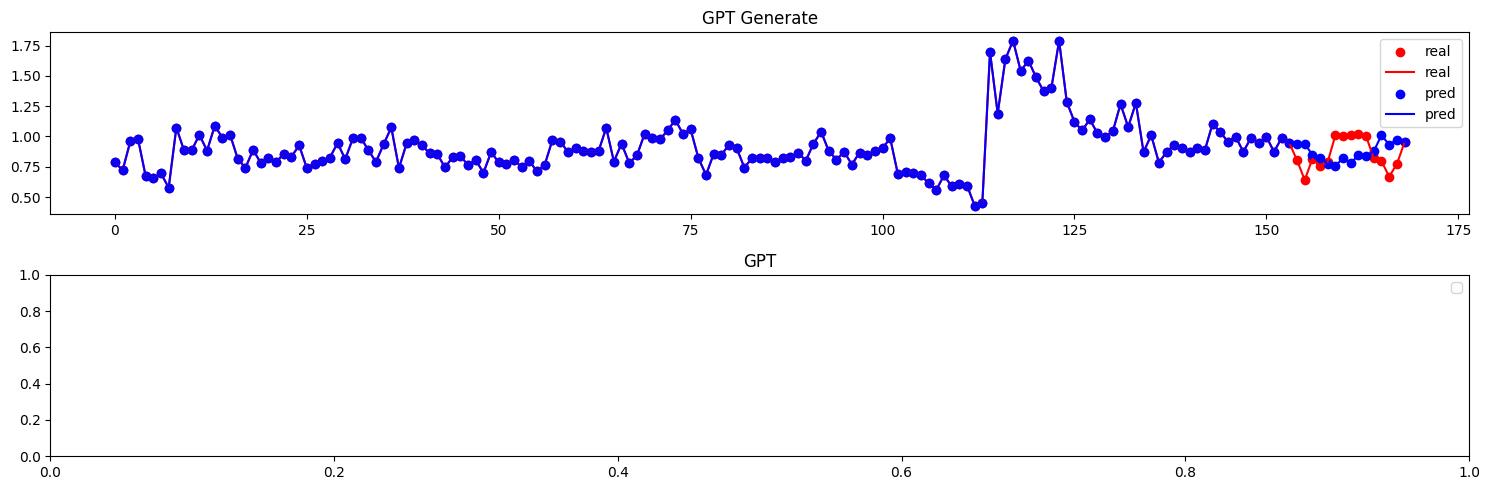

In [66]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([200, 24])
0 train loss =  1.754143476486206
500 train loss =  0.05923528969287872
1000 train loss =  0.02357388660311699
1500 train loss =  0.011610598303377628
2000 train loss =  0.006636967882514
2500 train loss =  0.004749412182718515


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


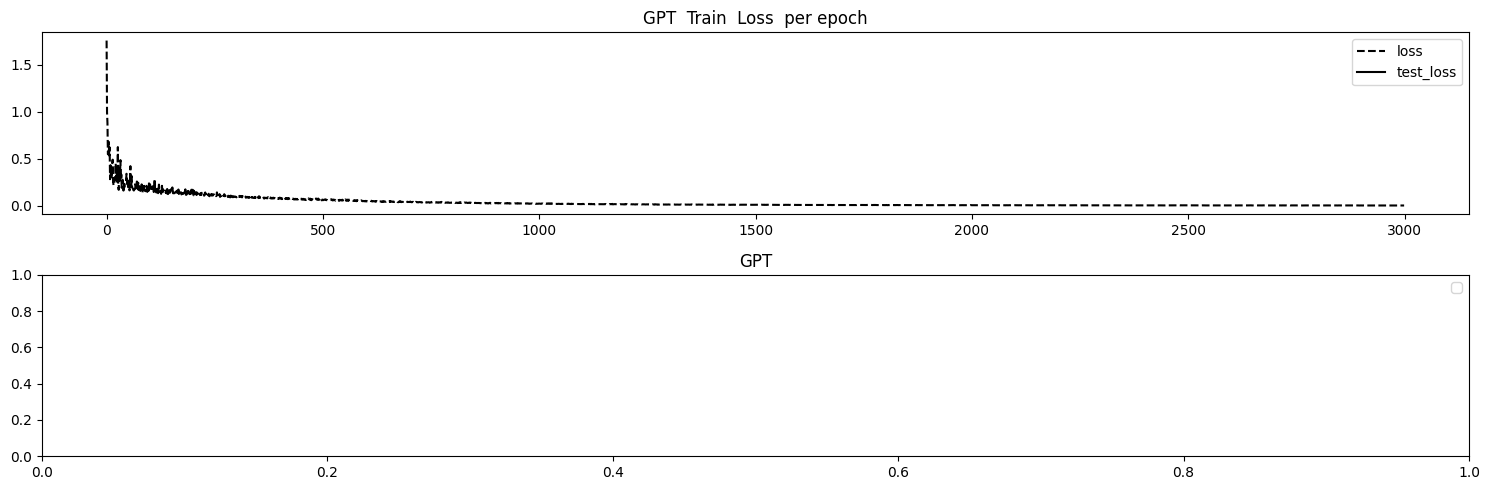

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

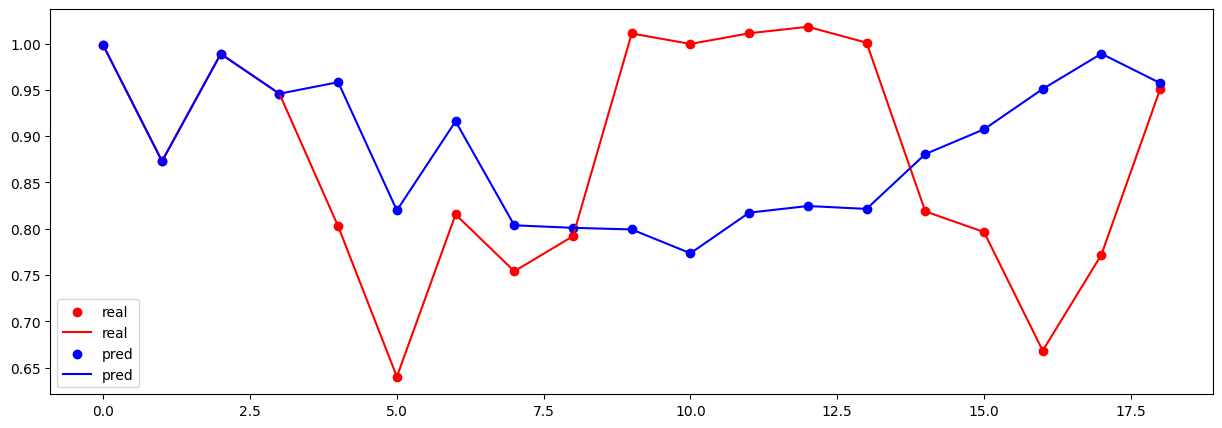

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(200, 24)
219


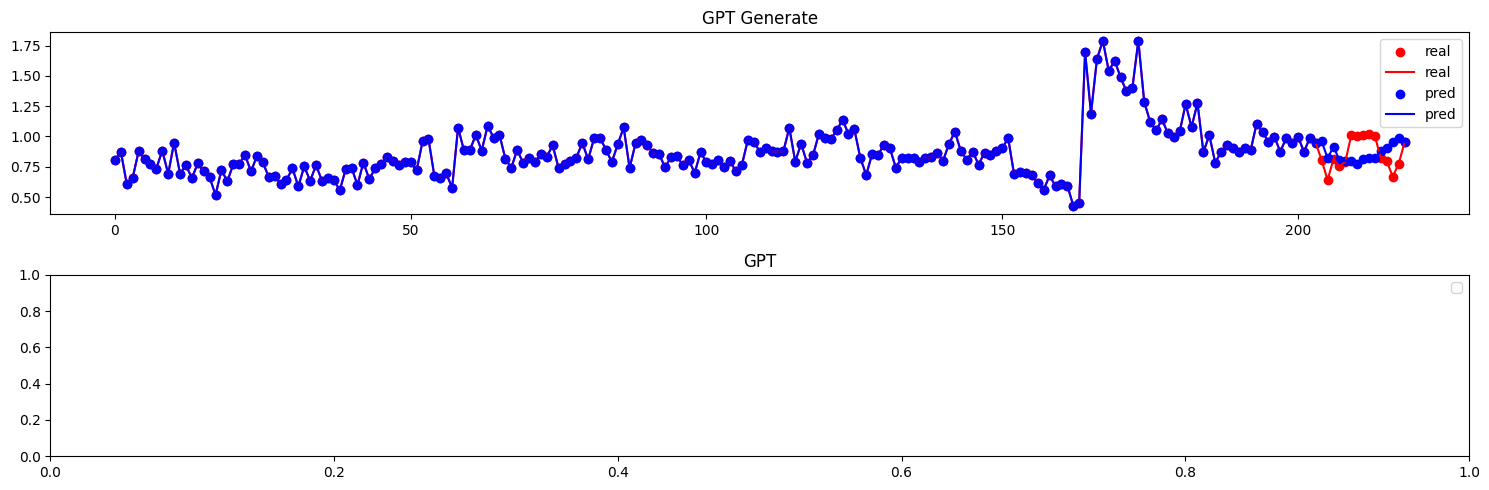

In [67]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 5


In [68]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 150  :  ] 
chunk200to400_train = train_CIVS[ 100  :  ]  
chunk100to400_train = train_CIVS[  50  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


1383
782
997
15
(50, 24)
(100, 24)
(150, 24)
(200, 24)


torch.Size([50, 24])
0 train loss =  1.326845407485962
500 train loss =  0.010795379057526588
1000 train loss =  0.005710053723305464
1500 train loss =  0.0032607775647193193
2000 train loss =  0.0024046439211815596
2500 train loss =  0.001924841315485537


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


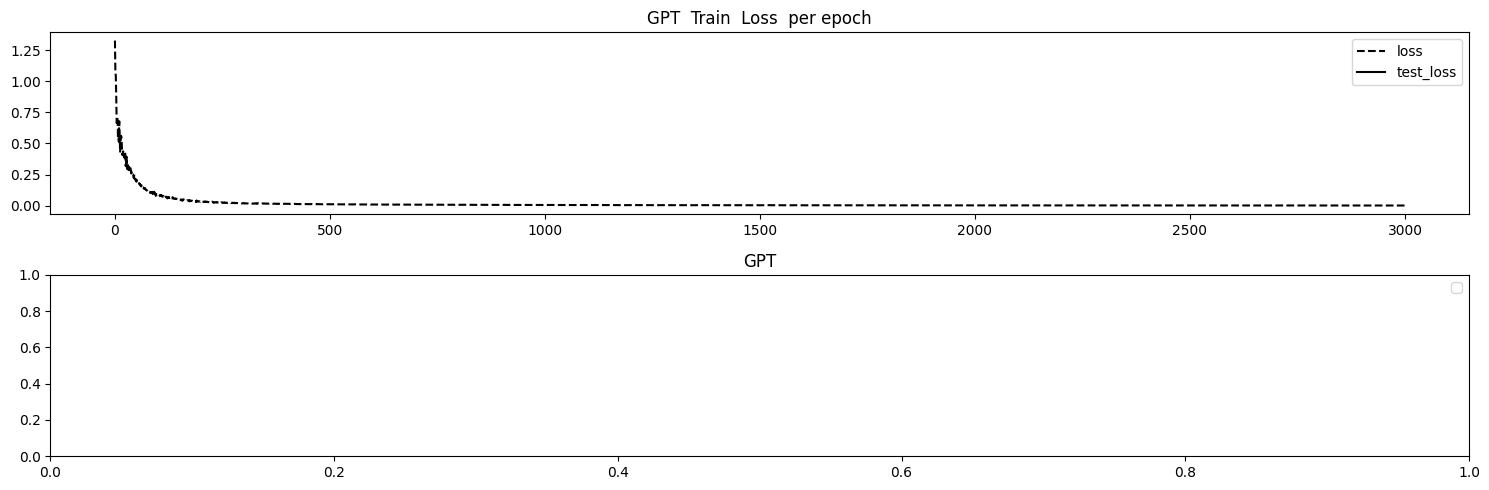

(15, 24)
(50, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])


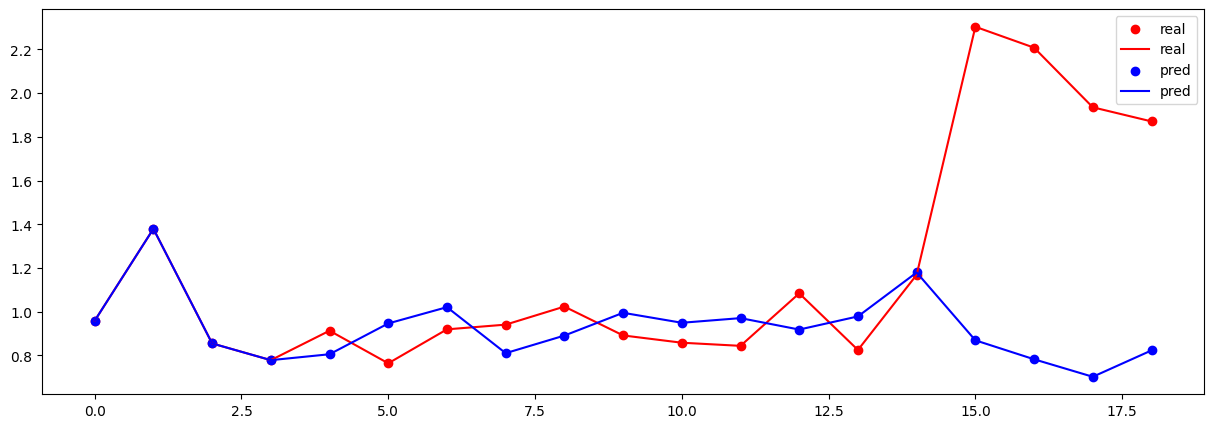

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(50, 24)
69


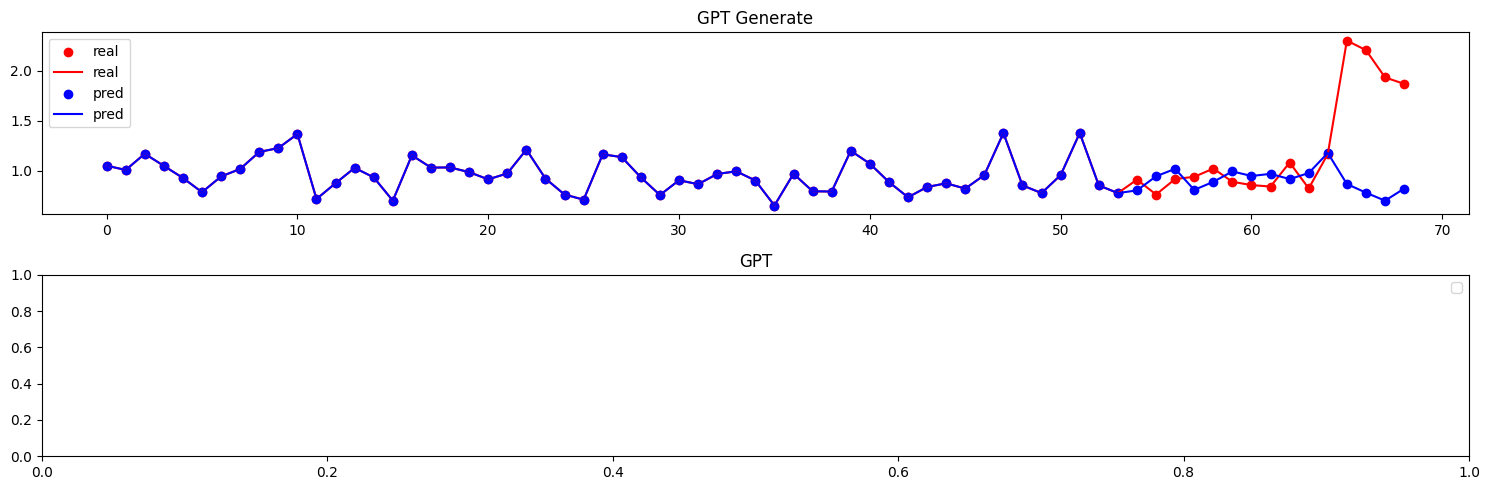

In [69]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([100, 24])
0 train loss =  0.9907292723655701
500 train loss =  0.02119475044310093
1000 train loss =  0.00871571060270071
1500 train loss =  0.004811896942555904
2000 train loss =  0.0040186489932239056
2500 train loss =  0.002990083070471883


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


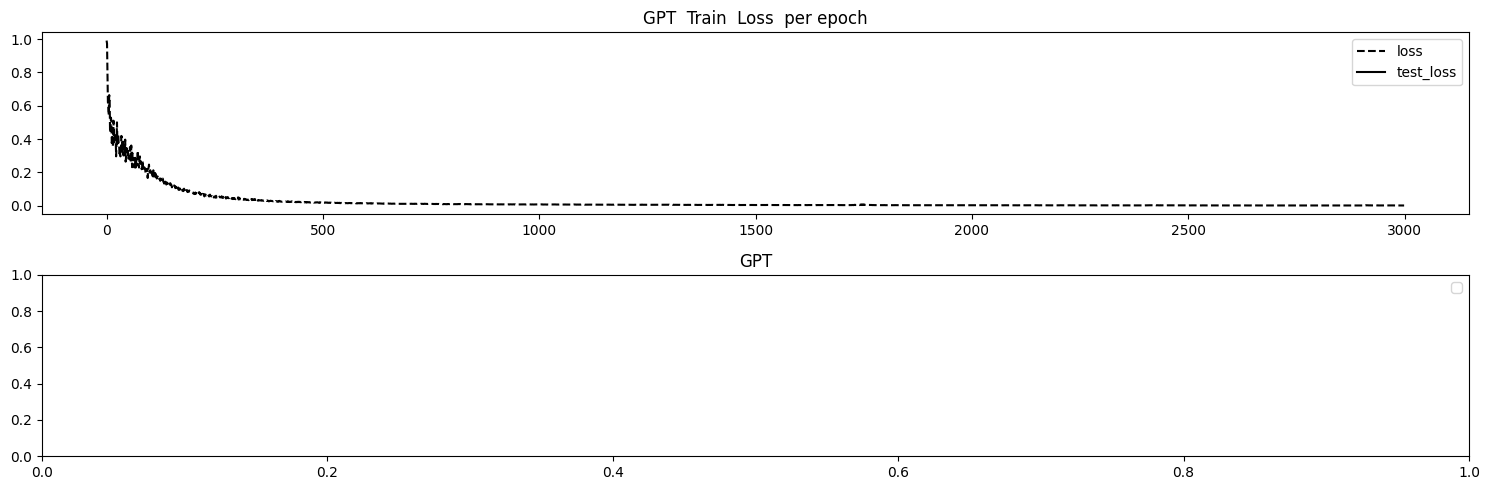

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

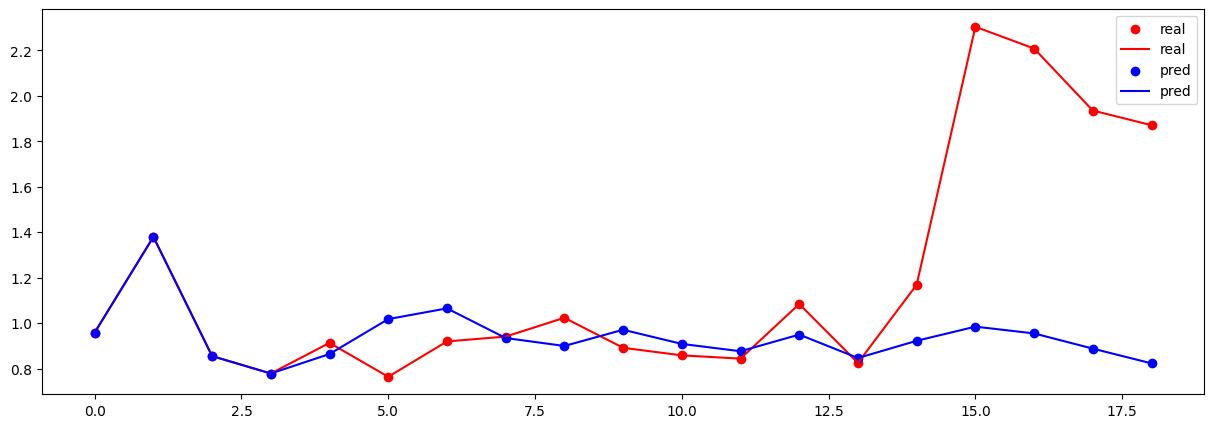

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


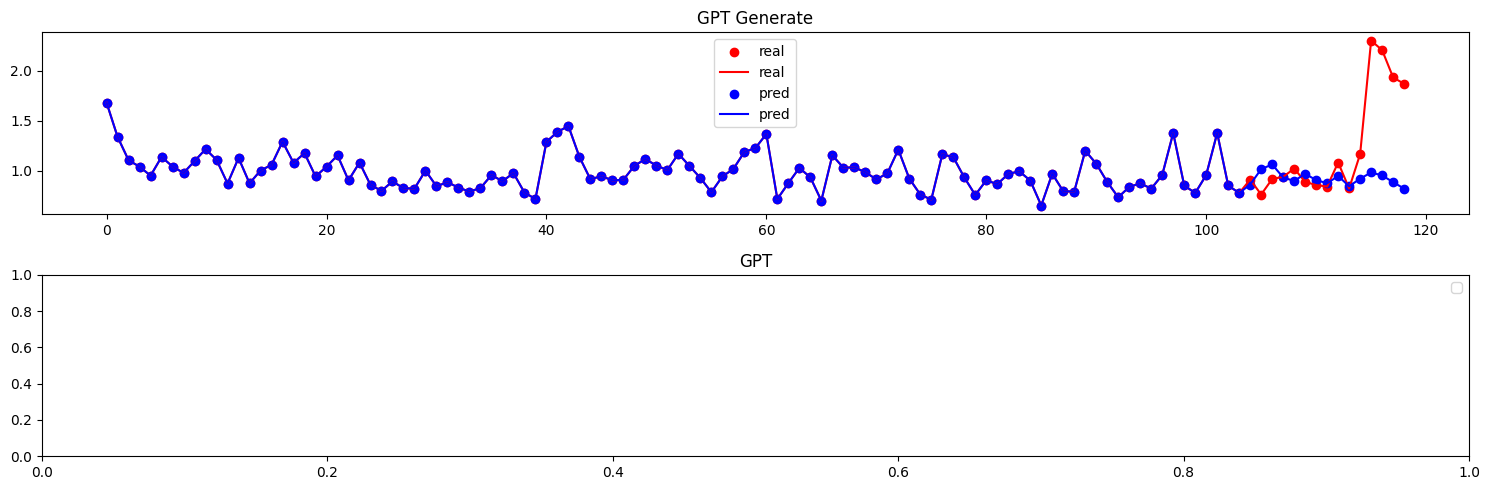

In [70]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([150, 24])
0 train loss =  1.2531554698944092
500 train loss =  0.03059384599328041
1000 train loss =  0.011907752603292465
1500 train loss =  0.007621446158736944
2000 train loss =  0.004943475592881441
2500 train loss =  0.003465259214863181


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


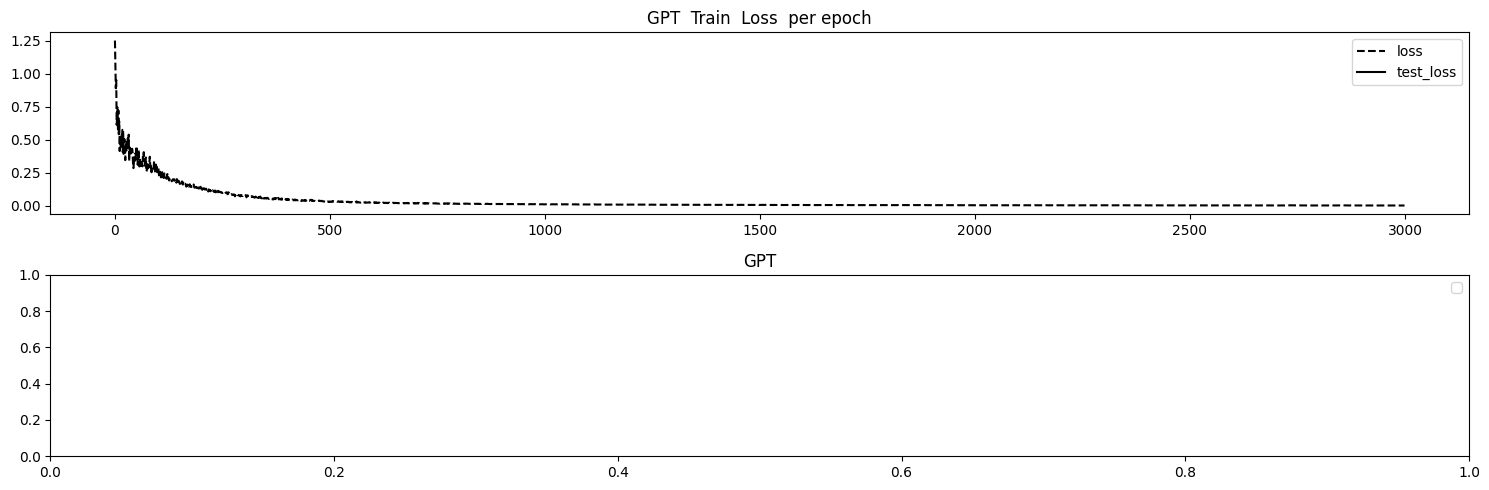

(15, 24)
(150, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

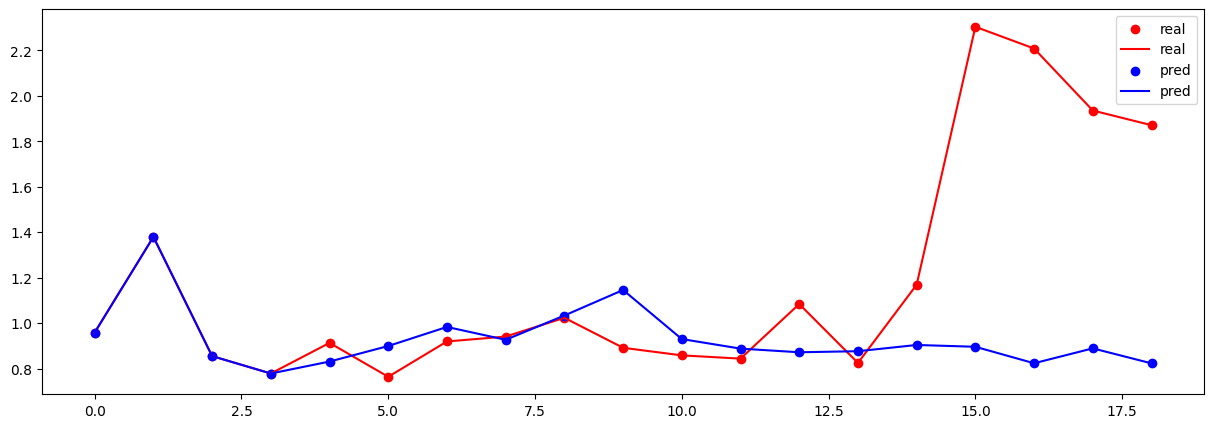

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(150, 24)
169


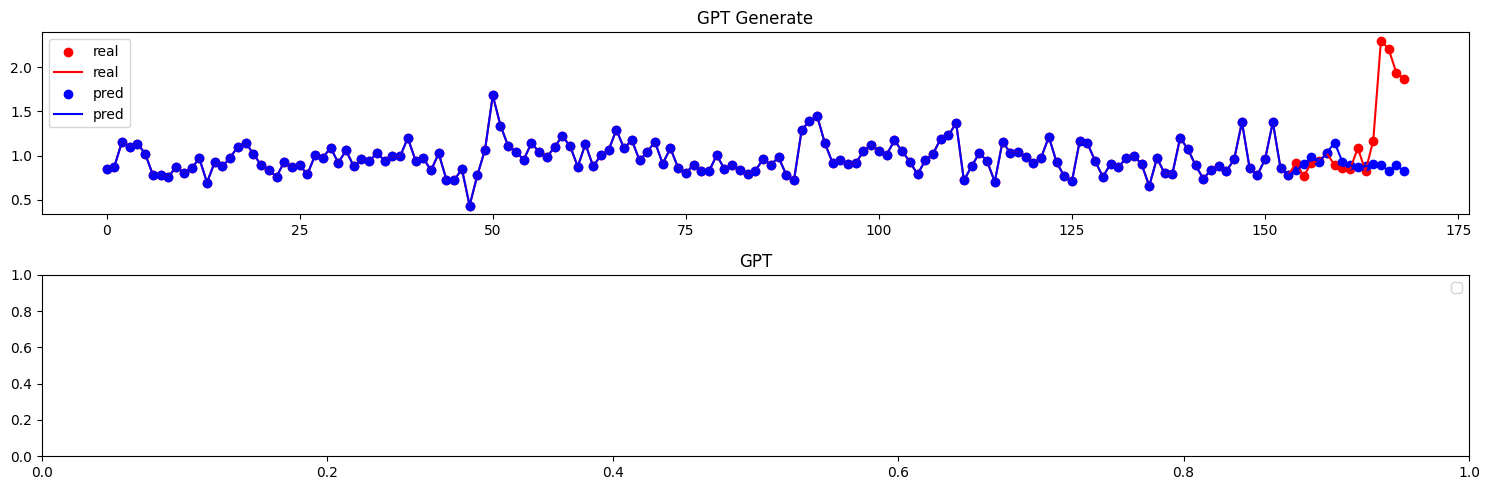

In [71]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([200, 24])
0 train loss =  1.2051887512207031
500 train loss =  0.046174950897693634
1000 train loss =  0.014758209697902203
1500 train loss =  0.008971153758466244
2000 train loss =  0.006212242413312197
2500 train loss =  0.004552330356091261


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


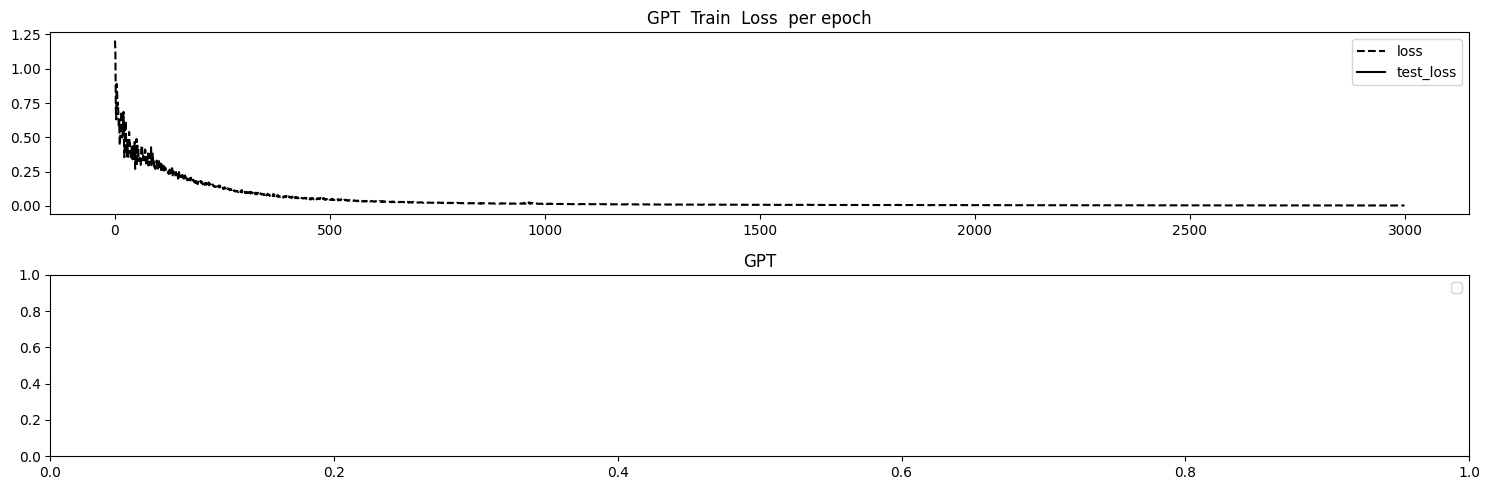

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

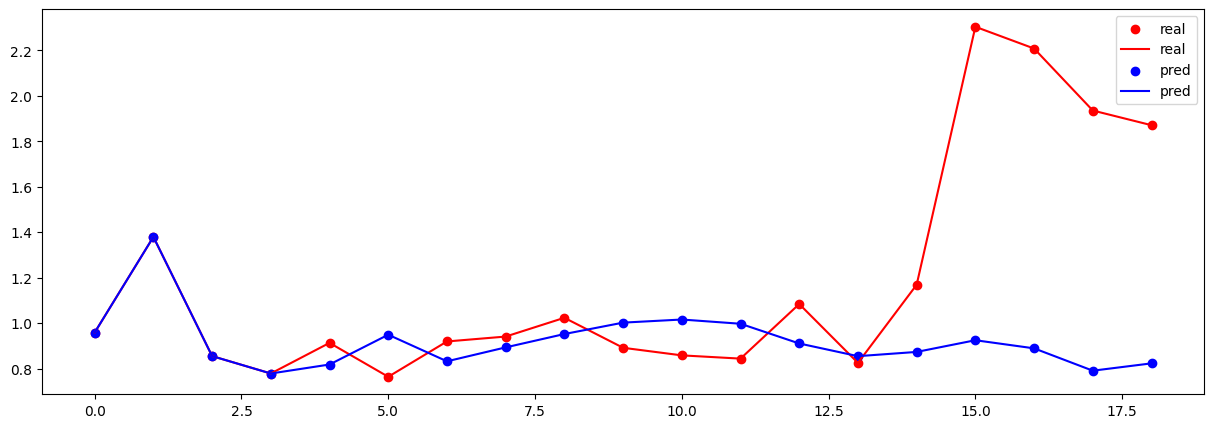

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(200, 24)
219


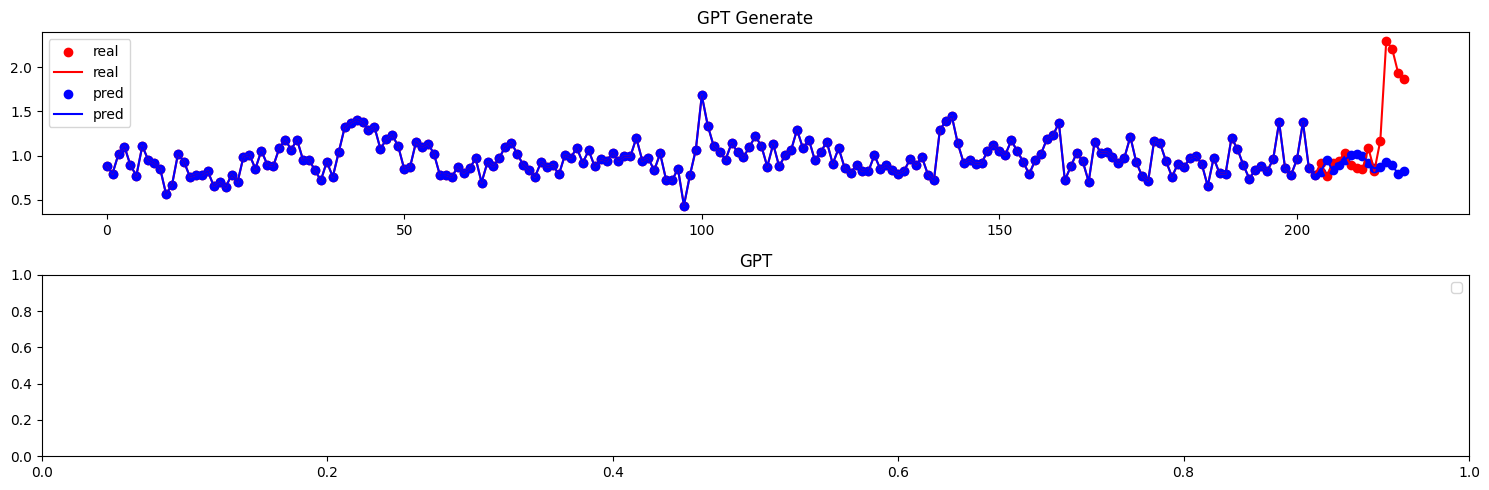

In [72]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 6


In [73]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 150  :  ] 
chunk200to400_train = train_CIVS[ 100  :  ]  
chunk100to400_train = train_CIVS[  50  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


1383
1041
1256
15
(50, 24)
(100, 24)
(150, 24)
(200, 24)


torch.Size([50, 24])
0 train loss =  1.2446537017822266
500 train loss =  0.010949847288429737
1000 train loss =  0.005635819397866726
1500 train loss =  0.003543125931173563
2000 train loss =  0.0024340064264833927
2500 train loss =  0.0017876648344099522


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


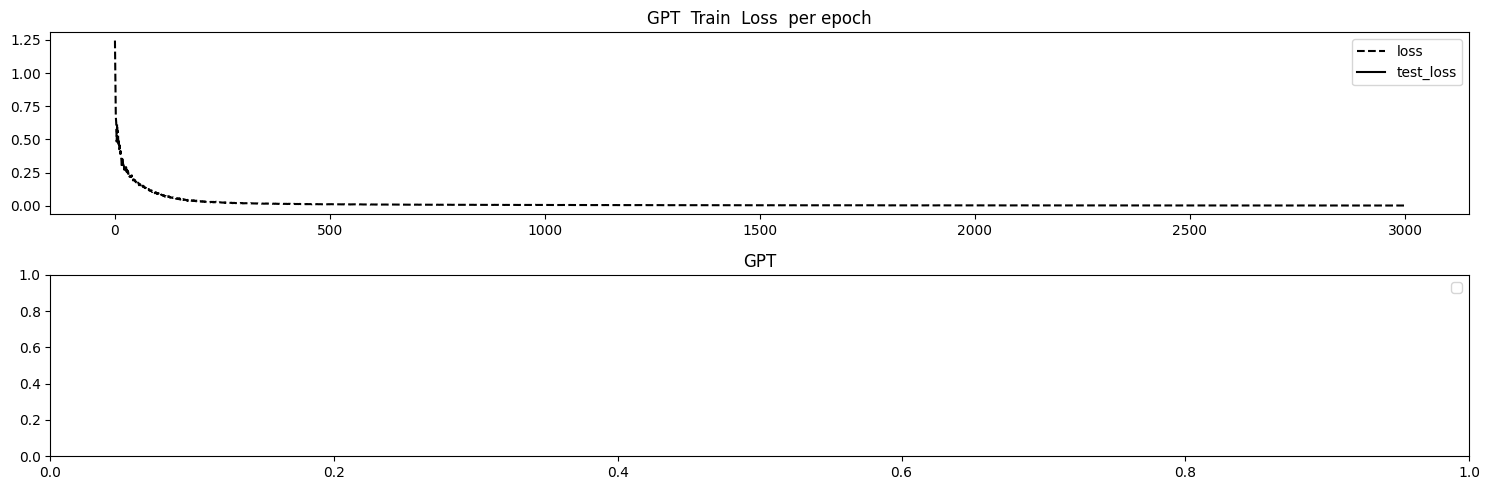

(15, 24)
(50, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])


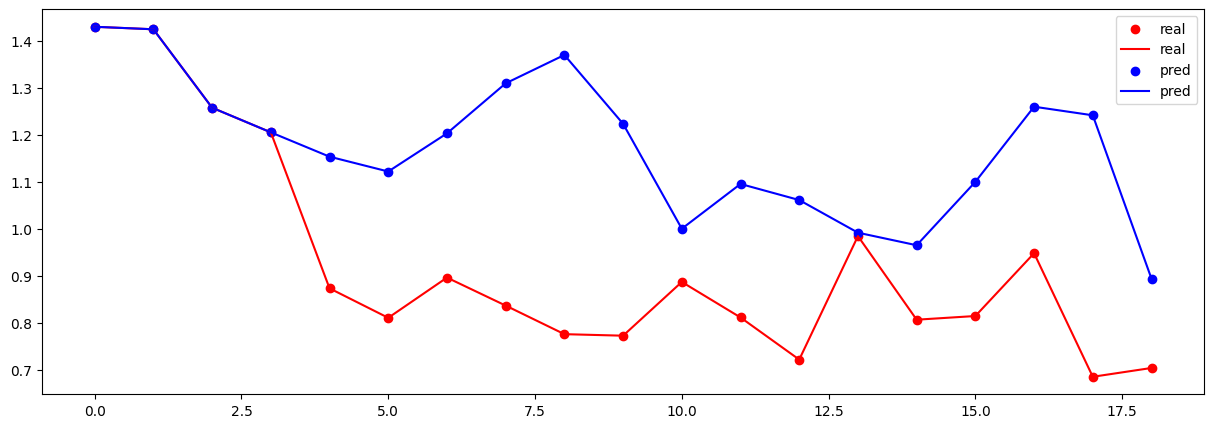

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(50, 24)
69


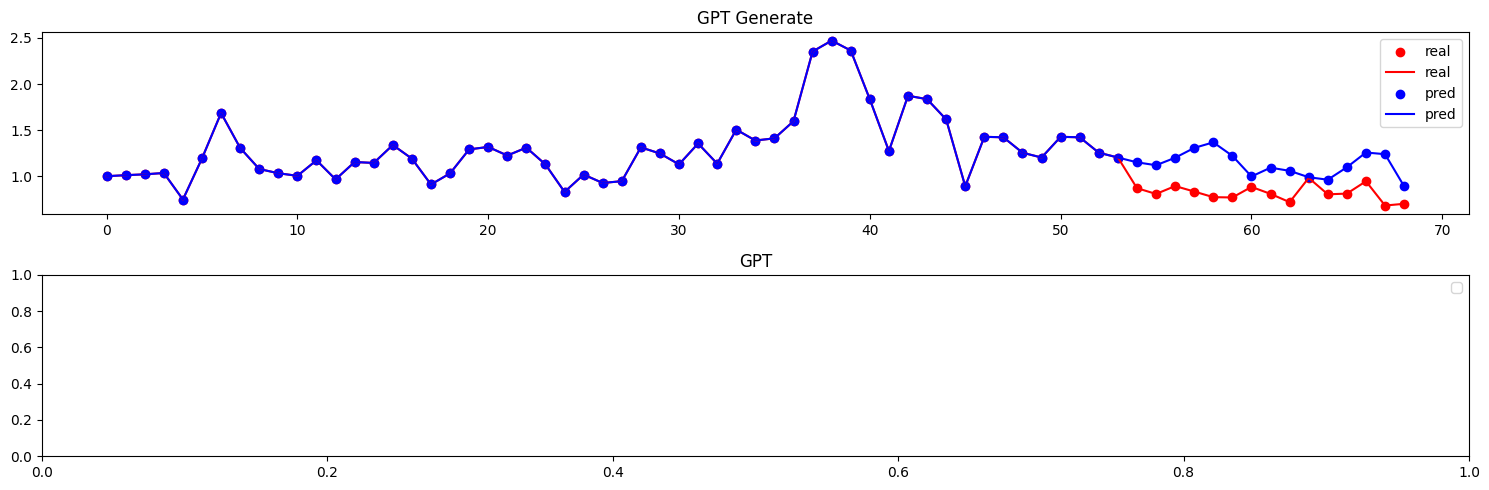

In [74]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([100, 24])
0 train loss =  1.176630973815918
500 train loss =  0.02378503978252411
1000 train loss =  0.010317412205040455
1500 train loss =  0.006137952674180269
2000 train loss =  0.00401551416143775
2500 train loss =  0.0029995646327733994


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


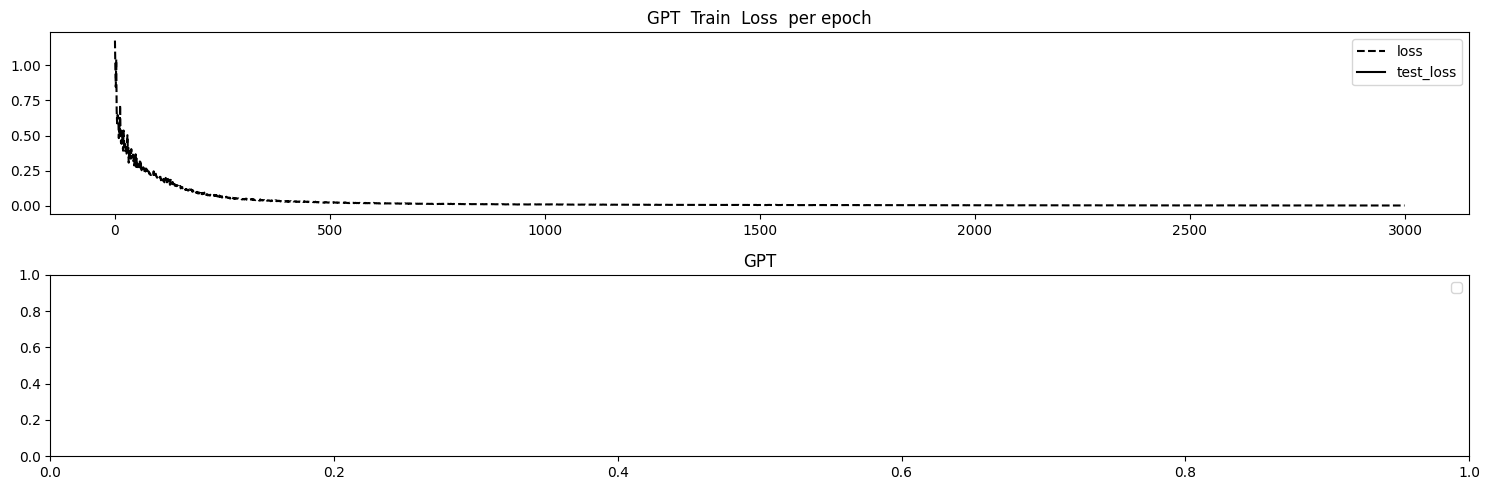

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

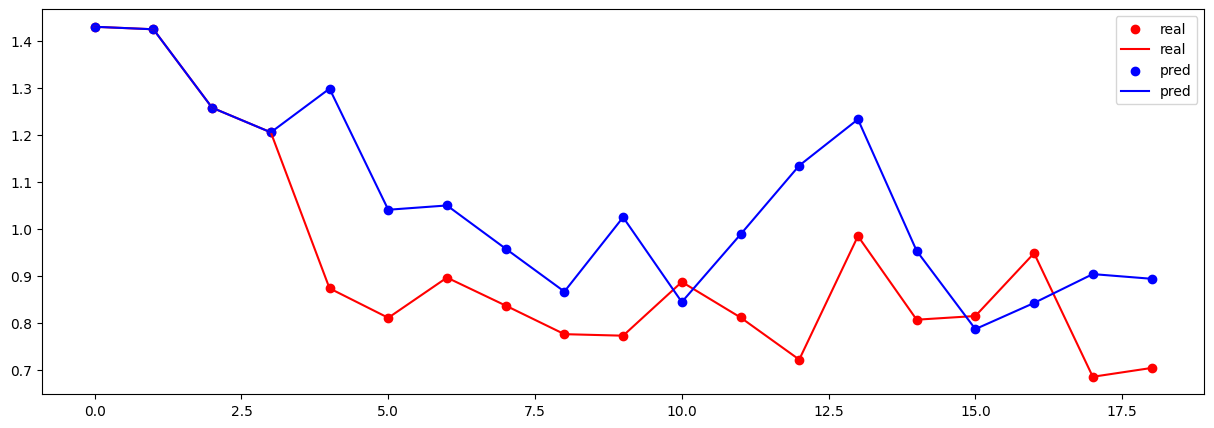

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 24)
119


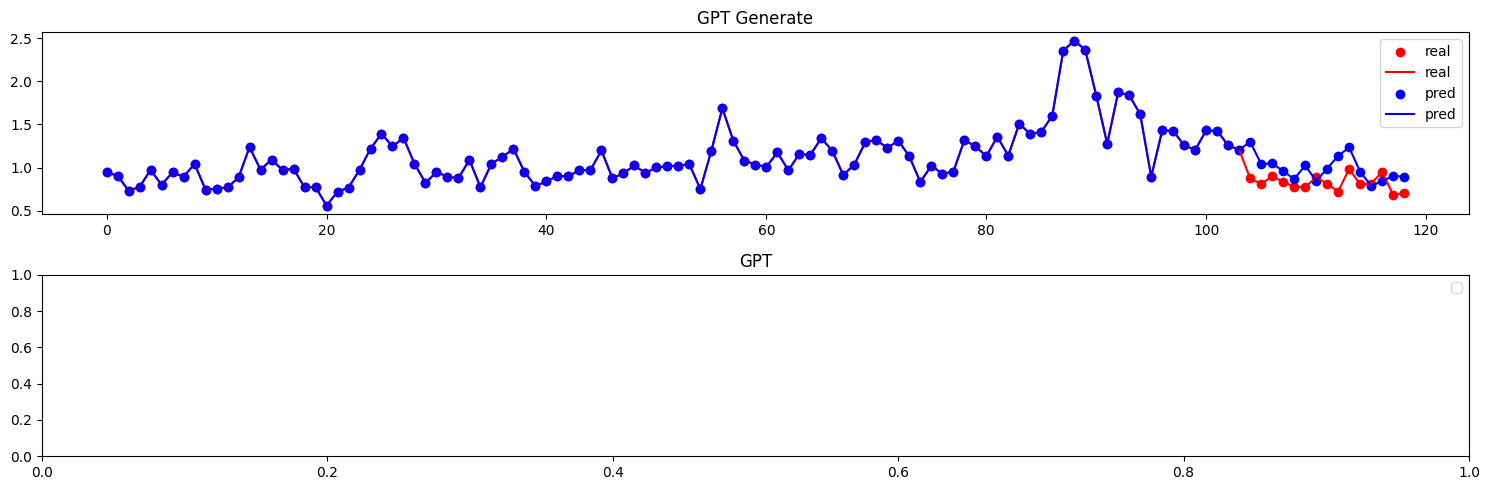

In [75]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([150, 24])
0 train loss =  1.227925419807434
500 train loss =  0.038017336279153824
1000 train loss =  0.014120330102741718
1500 train loss =  0.007397370878607035
2000 train loss =  0.005466724280267954
2500 train loss =  0.003540388075634837


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


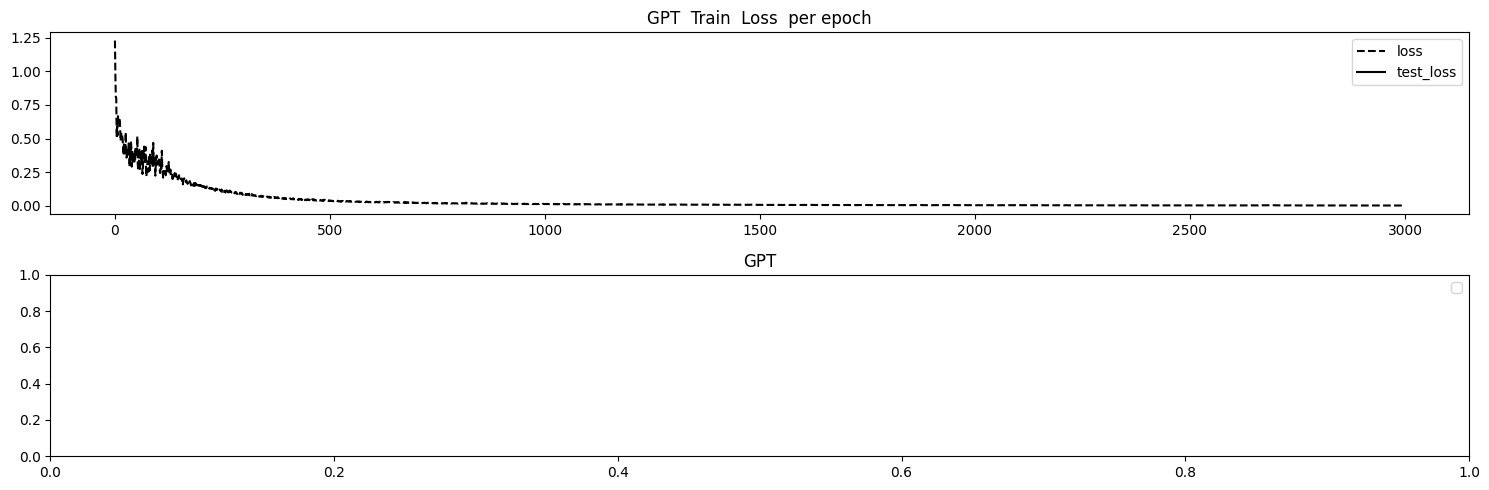

(15, 24)
(150, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

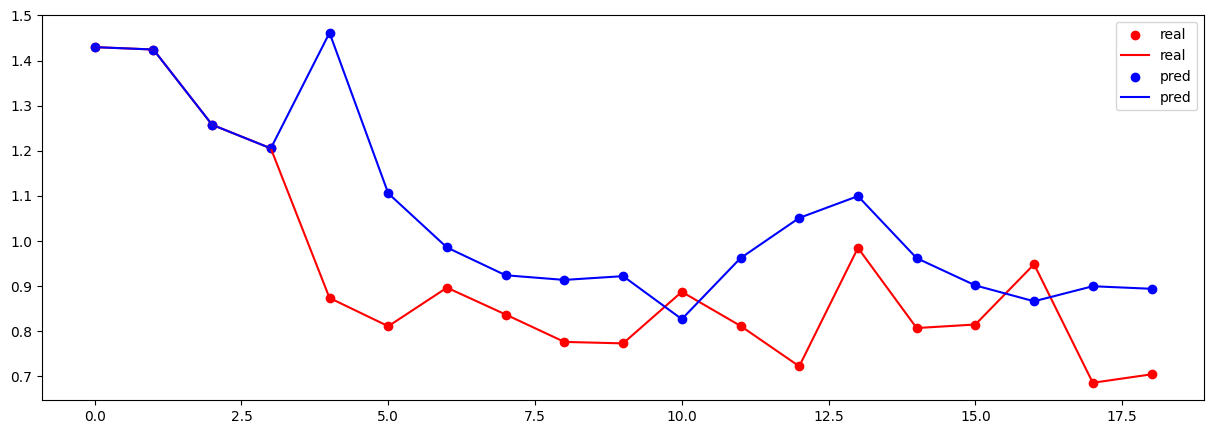

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(150, 24)
169


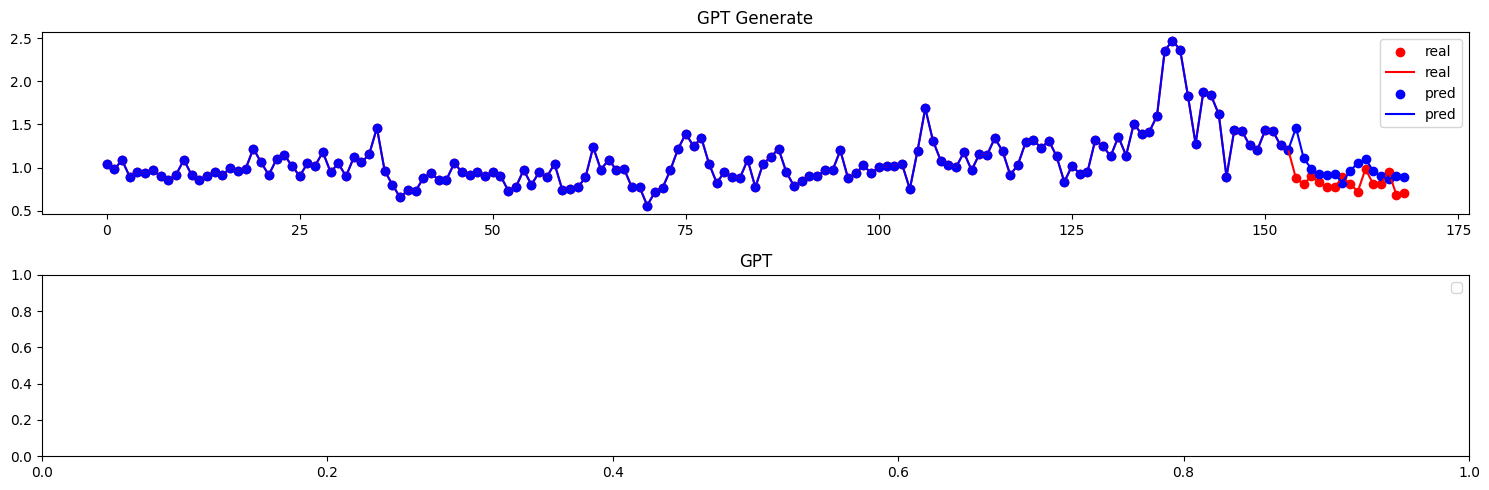

In [76]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([200, 24])
0 train loss =  1.1896854639053345
500 train loss =  0.06369409710168839
1000 train loss =  0.020068848505616188
1500 train loss =  0.010695140808820724
2000 train loss =  0.007075995206832886
2500 train loss =  0.004964076913893223


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


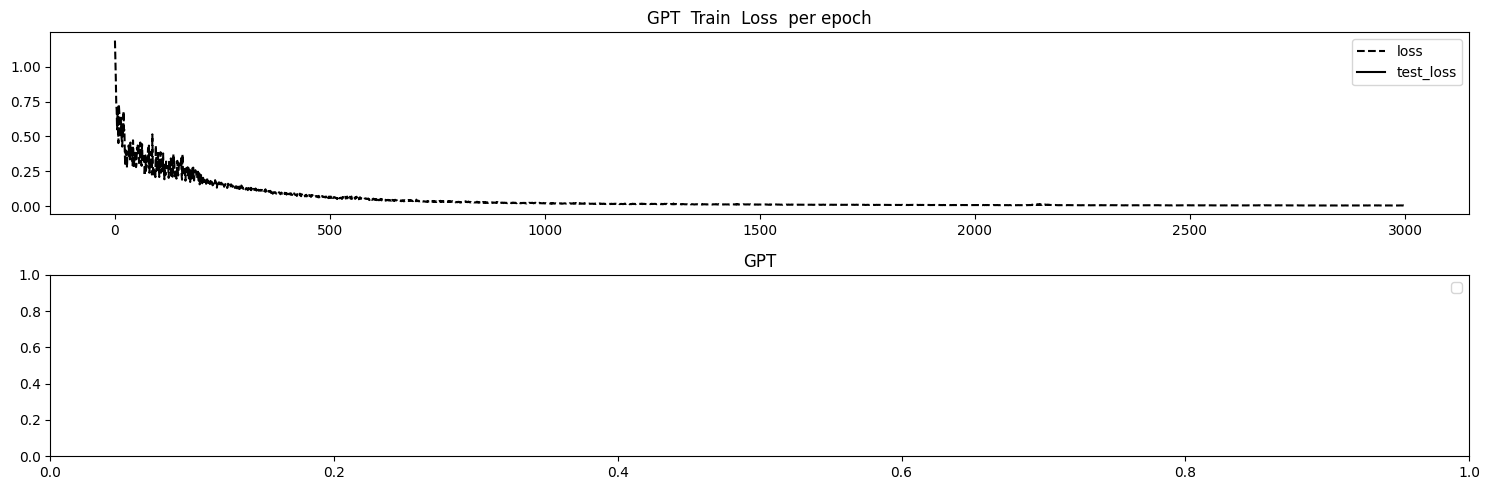

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

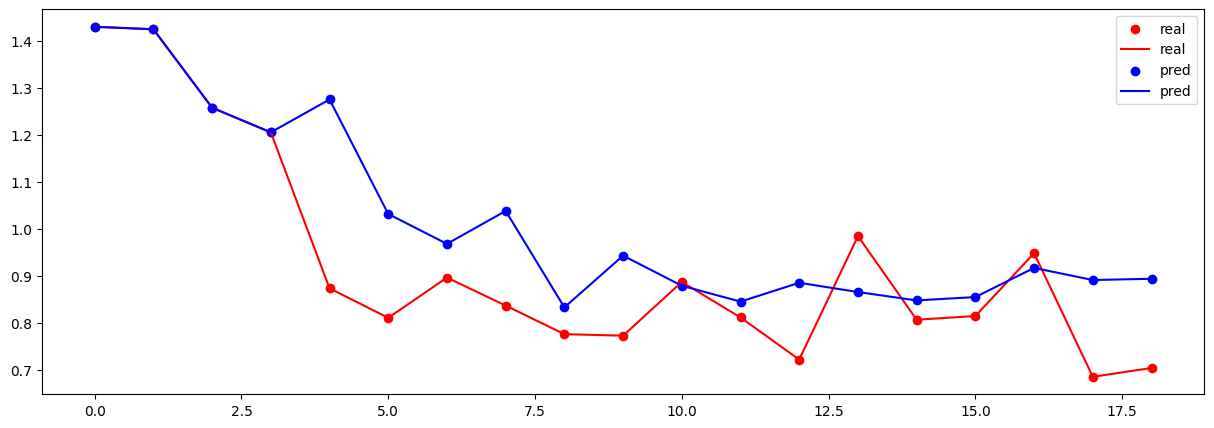

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(200, 24)
219


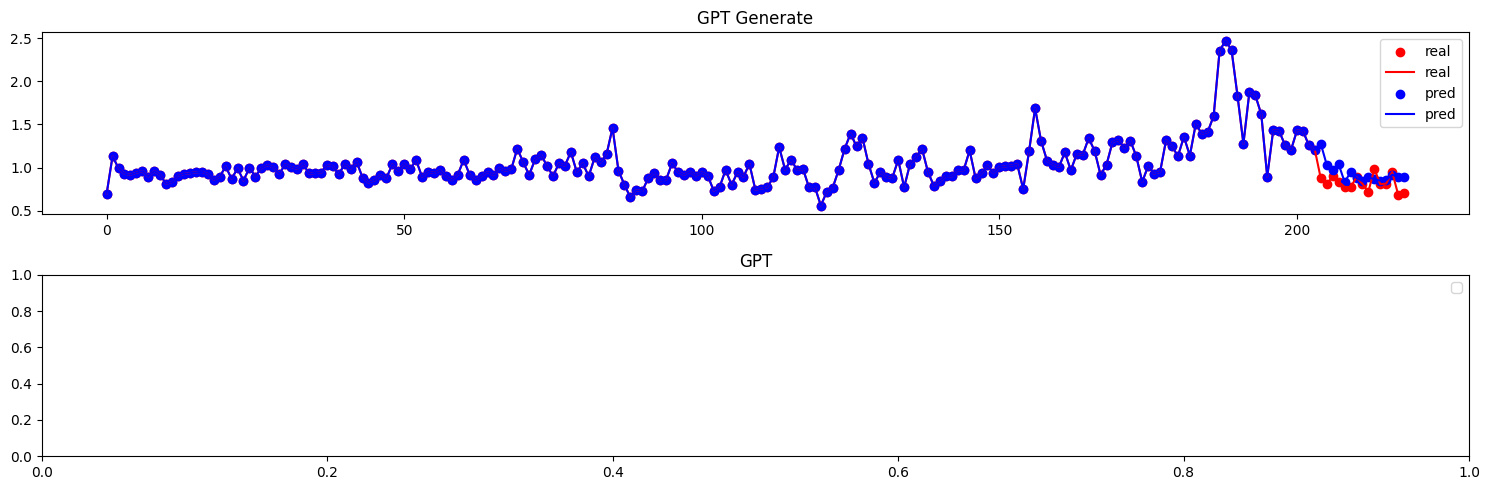

In [77]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )
